# Wrangle Act
Wrangling and analysis for a Udacity project.
Created by: Alan Glasper, March 8th, 2019

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#stage1">Stage 1: Gathering</a></li>
<li><a href="#stage2">Stage 2: Preparing</a></li>
<li><a href="#stage3">Stage 3: Assessing</a></li>
<li><a href="#stage4">Stage 4: Cleaning</a></li>
<li><a href="#stage5">Stage 5: Storing</a></li>
<li><a href="#stage6">Stage 6: Analysing and Visualizing</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#recommendations">Further Recommendations</a></li>
<li><a href="#references">References</a></li>
</ul>

### Prerequisites for each stage

There are three starting points to begin executing cells depending on what files already are available. If you have:
- `twitter-archive-enhanced.csv` start at Stage 1 (needs twitter api keys)
- `image-predictions.tsv` and `tweet_json.txt` start at Stage 2
- `twitter_archive_master` and `image_predictions_version_1` start at Stage 6

New needed libraries are loaded at the start of each stage, but only start executing at one of the start points or some libraries might not be loaded. Helper functions are defined at the start of the relevant stage.

The analysis generates graphics using Seaborn version 0.9.0 or greater. Please upgrade to at least this version before executing the cells in Stage 6.

<a id='intro'></a>
***
## Introduction
This section describes the structure of this document, which is divided into several 'stages'.

### Gathering (Stage 1)
The project requirements are to gather each of the three pieces of data as described below:

<ol>
<li>The WeRateDogs Twitter archive: twitter_archive_enhanced.csv

<li>The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

<li>Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. 
    
Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

<br><font color='red'>Note: to re-execute this section you need to enter your Twitter API keys, secrets, and tokens in the appropriate cell. </font>
    
</ol>

### Preparing (Stage 2)
The gathered files and data are further prepared into datasets prior to assessing and cleaning. 

### Assessing (Stage 3)
After gathering each of the above pieces of data, the datasets are assessed visually and programmatically for quality and tidiness issues and these are documented. Prior to cleaning, copies of the assessed datasets are created. During assessment some useful columns are created that can be used later for cleaning. These are created in a copy of the dataset. 

### Cleaning (Stage 4)
Each of the issues documented while assessing are cleaned, if possible. The cleaning of each issue is made in three steps: Define, Code and Test. 

### Storing (Stage 5)
The cleaned DataFrame(s) are stored appropriately with the names and formats required by the project description.
>Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately.

### Analyzing and Visualizing (Stage 6)
 
The wrangled data is analyzed and visualized.

### Conclusions
Conclusions are drawn from the analysis and visualizations.

### Recommendations
Recommendations for further work are proposed. 

### References
References used during the data wrangling and analysis are listed.
The reference number can be found in the cell that first uses it. 

<a id='stage1'></a>
***
## Gathering (Stage 1) - collect the needed files and data

In [1]:
import numpy as np
import pandas as pd
import requests
import json
import tweepy
import os

# Dependencies:

# pd.read_json using lines=True for line-by-line reading in json 
# objects needs at least Pandas version 0.19.0.

<font color='red'>Set the Twitter API keys here. Unless the keys are set, the twitter-related code will not execute and so stop with an error. If yoou have no keys, start from Stage 2. </font>

In [2]:
consumer_key = '' # insert your consumer key here
consumer_secret = '' # insert your consumer secret here
access_token = '' # insert your access token here
access_token_secret = '' # insert your access token secret here

In [3]:
# Helper functions are defined here.

# Used reference #1 to define this function (see references).

def chunks(l, n):
    """Yield chunks of defined size from a list.

    Args:
        (int) l - list to be chunked
        (int) n - size of chunks
    Returns:
        (generator) a generator yielding the list l in chunks of size n
    """
    n = max(1, n) # ensures n is greater than or equal to 1
    return (l[i:i+n] for i in range(0, len(l), n))

<a id='files'></a>
The enhanced twitter data was directly downloaded from a link provided by Udacity:

https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv



In [4]:
# Read in the enhanced twitter archive into a dataframe called ea.
# The file is provided by Udacity as part of the project instructions.

# If this file is missing, it may be downloaded from here:
# enhanced_archive_url = 'https://d17h27t6h515a5.cloudfront.net/\
#topher/2017/August/59a4e958_twitter-archive-enhanced/\
#twitter-archive-enhanced.csv'
# ea = pd.read_csv(enhanced_archive_url)

ea = pd.read_csv('twitter-archive-enhanced.csv')
ea.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The next file must be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher\
/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open(os.path.split(url)[1], 'wb') as f, \
    requests.get(url) as r:
    if r.status_code == requests.codes.ok:
        print('Get for downloading image predictions was successful')
    else:
        print('Get for downloading image predictions failed')
    f.write(r.content)
     

Get for downloading image predictions was successful


In [6]:
# Read in the predictions file.
ip = pd.read_csv('image-predictions.tsv',sep='\t')
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The next file is created by accessing stored tweets via the Twitter API.
Following the project instructions, the tweets are written line by line to a file. Later, this file is read back line by line into a pandas DataFrame.

In [7]:
# Set up the Twitter API. 
# Keys and tokens can be defined at the start of this notebook. 
# Reference #2 was used in setting up and using this api (see references).

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
# Test that the API is working correctly, using a single tweet.
 
tweet_id = 892420643555336193
try:
    status = api.get_status(tweet_id)
    print(status)
except Exception as e:
    out = None
    print('The API is not working. Did you set the API keys?')
    raise

In [ ]:
# Create a list of tweet ids from the enhanced archive (ea) in chunks.
# The chunk size is set to 100, which is the maximum block for lookups.
# The helper function is defined at the start of the stage. 

tweet_id_lists = list(chunks(ea['tweet_id'], 100))
print('Number of tweet blocks: ', len(tweet_id_lists))
print('Number of tweets in first block: ', len(tweet_id_lists[0]))
print('Number of tweets in last block: ', len(tweet_id_lists[-1]))

When retrieving the tweets in the enhanced archive from the online twitter archive, the project instructions require this procedure:
>*Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line.*

(Note there are other ways to do this line by line, e.g pd.read_json(..., lines = True). 

In [ ]:
# Create a file to store the tweets. 
# Open file for writing. File pointer placed at beginning of the file. 
# Overwrites existing file and creates a new one if it does not exist.

with open('tweet_json.txt', 'w') as tj:
    for tweet_block in tweet_id_lists:
        status_list = api.statuses_lookup(list(tweet_block))
        i = 1
        for status in status_list:
            json.dump(status, tj)
            tj.write('\n')
        print('.', end='') 
# Monitor progress, one dot per tweet block.

<a id='stage2'></a>
***
## Preparing  (Stage 2) - prepare the files for assessment

Begin here if the files have already been gathered. If not, see stage 1. 

In [9]:
import numpy as np
import pandas as pd 
import json

In [10]:
ea = pd.read_csv('twitter-archive-enhanced.csv')
ip = pd.read_csv('image-predictions.tsv',sep='\t')

In [11]:
print('Tweets from {} to {}'.format(ea.timestamp.min(), 
                                    ea.timestamp.max()))

Tweets from 2015-11-15 22:32:08 +0000 to 2017-08-01 16:23:56 +0000


In [12]:
ea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Now import the tweets file into a dataframe and drop anything not needed. 
The project instructions require this procedure:
>*Read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.* 

In [14]:
# Create a dataframe line by line from the tweets file.
# The file is new-line-separated json objects. 
# Open file for reading. File pointer placed at beginning of the file. 

json_list = []
with open('tweet_json.txt', 'r') as tj:
    for line in tj:
        jdict = json.loads(line)
        json_list.append(jdict)
# Convert the list into a pandas DataFrame.
tw_all = pd.DataFrame(json_list)

Examine the first three tweets and compare to the first row in the dataframe. The first two do not have media files (see description below). 

In [15]:
json_list[0:3]

[{'created_at': 'Sun Jun 18 16:57:37 +0000 2017',
  'id': 876484053909872640,
  'id_str': '876484053909872640',
  'text': 'This is Benedict. He wants to thank you for this delightful urban walk. Hopes you know he loves you. 13/10 super du… https://t.co/ccBFQU5UWO',
  'truncated': True,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/ccBFQU5UWO',
     'expanded_url': 'https://twitter.com/i/web/status/876484053909872640',
     'display_url': 'twitter.com/i/web/status/8…',
     'indices': [117, 140]}]},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 4196983835,
   'id_str': '4196983835',
   'name': 'WeRateDogs™',
   'screen_name': 'dog_rates',
   'location': '「 DM YOUR DOGS 」',
   'description': 

In [16]:
pd.options.display.max_columns = None
tw_all.head(3)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Sun Jun 18 16:57:37 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,18378,False,None,876484053909872640,876484053909872640,None,NaN,None,NaN,None,False,en,None,False,NaN,NaN,NaN,2341,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Sat Jul 15 23:25:31 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,20728,False,None,886366144734445568,886366144734445568,None,NaN,None,NaN,None,False,en,None,False,NaN,NaN,NaN,3112,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Wed Jun 21 19:36:23 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,None,877611172832227328,877611172832227328,None,NaN,None,NaN,None,False,en,None,False,NaN,NaN,NaN,78,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
tw_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 29 columns):
contributors                 0 non-null object
coordinates                  0 non-null object
created_at                   2340 non-null object
entities                     2340 non-null object
extended_entities            1822 non-null object
favorite_count               2340 non-null int64
favorited                    2340 non-null bool
geo                          0 non-null object
id                           2340 non-null int64
id_str                       2340 non-null object
in_reply_to_screen_name      77 non-null object
in_reply_to_status_id        77 non-null float64
in_reply_to_status_id_str    77 non-null object
in_reply_to_user_id          77 non-null float64
in_reply_to_user_id_str      77 non-null object
is_quote_status              2340 non-null bool
lang                         2340 non-null object
place                        1 non-null object
possibly_sensitive 

The tweet JSON dictionary is described at:

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json.html

According to the project instructions, only original tweets with media files are to be included in the final dataset. Tweets are only listed until August 1st 2017 (so August is present but incomplete) and `extended_tweet` fields were introduced by twitter in November 2017, so that is why they are absent. If `truncated` is True, then this therefore implies - only for this dataset - that the tweet is not original. 

#### Obtaining media file data
There is always an `entities` field, which captures content like hastags, user mentions, URLs, etc. It also includes the first - but only the first - native media data and marks it as a photo, regardless of what type it was. Three media types are currently possible: photo, video or animated GIF. The media object contains a link to the photo or to thumbnails of the video or animated GIF. Here it is assumed that thumbnails are ok to be collected, but the type will be collected as well. 
The media file data is better taken from `extended_entities`, in which `media` is a list of media objects and this is where native media data descriptions are stored: up to four photos or a video or an animated GIF. The type has to be the same for all media, so a photo cannot be combined with a video or a GIF. It suffices therefore to obtain the type from the first media object.

Spot checks indicated that where there is no `extended_entities`, there is also no media object in the `entities` field. So "no files" equates to no `extended_entities`.

Only tweets with non-null `extended_entities` will be included, the rest will be dropped. The following data will need to be extracted for the media files:
- Type of media by reading `type` from the first media object in the list.
- List of media URLs (up to 4) (using `media_url` rather than `media_url_https` as the latter is intended for embedding in https pages).
- Number of media URLs, for convenience. 

In both `entities` and `extended_entities` there is an object with a URL to the complete tweet image in which the text is combined ('expanded') with other content and media. It is named `expanded_url`. This is also provided in each of the media objects in `extended_entities`. But note that there is only one `expanded_url` per tweet even though it may appear multiple times in the JSON. This could be of interest to provide a complete image of the tweet so will also be collected:
- `expanded_url` by reading from the first media object in the list.

#### Identifying original tweets
Retweets have a `retweeted_status` object with original content but allow no new content or media. Quote tweets have a `quoted_status` and unlike retweets allow new content but not new media. Quote tweets can be identified by the flag `is_quote_status`. The assumption here from interpreting the project instructions is that replies should also not be included as they reply to original tweets. Replies have a `in_reply_to_xxxx` object, of which three variants are possible. These are probably all filled out together but to be sure they will all be checked. 

The test for original tweets is therefore:

The following is False:
- `is_quote_status`

and the following are Null:
- `retweeted_status`
- `in_reply_to_screen_name`
- `in_reply_to_status_id`
- `in_reply_to_user_id`

Note that `retweeted` is set only if the authenticated user accessing the tweet has retweeted it, so in this case will always be False. The same applies to `favorited`. So these are not required. 

Finally a check can be made if any `truncated` remain True and investigated. All unused columns can later be dropped from the DataFrame. The following columns should be included:
- `id` (take the integer rather than the string, for compatibility with the other tables)
- `retweet_count`
- `favorite_count`

Drop all columns except those of interest, included in this order:
- `id` 
- `retweet_count`
- `favorite_count`
- `extended_entities`
- `is_quote_status`
- `retweeted_status`
- `in_reply_to_screen_name`
- `in_reply_to_status_id`
- `in_reply_to_user_id`
- `truncated`

**To add new columns from the extracted tweet data, add more columns here.**

In [18]:
tw = tw_all[['id', 'retweet_count', 'favorite_count', 
             'extended_entities',
             'is_quote_status', 'retweeted_status',
             'in_reply_to_screen_name', 'in_reply_to_status_id',
             'in_reply_to_user_id', 'truncated']]
tw.head()

,id,retweet_count,favorite_count,extended_entities,is_quote_status,retweeted_status,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,truncated
0,876484053909872640,2341,18378,NaN,False,NaN,None,NaN,NaN,True
1,886366144734445568,3112,20728,NaN,False,NaN,None,NaN,NaN,True
2,877611172832227328,78,0,"{'media': [{'id': 876850756556607488, 'id_str'...",False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,None,NaN,NaN,False
3,888078434458587136,3393,21272,NaN,False,NaN,None,NaN,NaN,True
4,891689557279858688,8407,41198,"{'media': [{'id': 891689552724799489, 'id_str'...",False,NaN,None,NaN,NaN,False


<a id='stage3'></a>
***
## Assessing (Stage 3)
The three datasets to be assessed are now in pandas DataFrames:

**`ea`**: enhanced archive of twitter data (but missing some items in `tw`)

**`ip`**: image predictions

**`tw`**: additional data from the online twitter archive (columns selected already)

><font color='red'>(Warning: do not begin execution of cells here. Start at Stage 2 if files are available).</font>

Visual inspection of the three tables (repeatedly ran samples here and the original saved files were inspected with other tools).

In [19]:
from IPython.display import Image
from IPython.core.display import HTML

In [20]:
ea.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
2086,670803562457407488,NaN,NaN,2015-11-29 03:16:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I would do radical things in the name of Dog G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670803562...,10,10,None,None,None,None,None
1823,676533798876651520,NaN,NaN,2015-12-14 22:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676533798...,12,10,None,None,None,None,None
571,801538201127157760,NaN,NaN,2016-11-23 21:29:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He'll be your chau-fur this e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801538201...,12,10,Wallace,None,None,None,None
1200,716730379797970944,NaN,NaN,2016-04-03 20:53:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There has clearly been a mistake. Pup did noth...,NaN,NaN,NaN,https://twitter.com/chpsanfrancisco/status/716...,12,10,None,None,None,None,None


In [21]:
ip.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
627,680836378243002368,https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg,3,Pembroke,0.427781,True,Shetland_sheepdog,0.160669,True,Pomeranian,0.111250,True
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True
921,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,Pomeranian,0.491022,True,weasel,0.130879,False,Yorkshire_terrier,0.099241,True
164,668975677807423489,https://pbs.twimg.com/media/CUit1O1WoAEBHjj.jpg,1,basset,0.605437,True,Welsh_springer_spaniel,0.184783,True,Saint_Bernard,0.116299,True
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,True,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,0.020126,True


In [22]:
tw.sample(5)

,id,retweet_count,favorite_count,extended_entities,is_quote_status,retweeted_status,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,truncated
1434,697616773278015490,1072,3290,"{'media': [{'id': 697616761932283904, 'id_str'...",False,NaN,None,NaN,NaN,False
2275,668627278264475648,118,321,"{'media': [{'id': 668627275181633536, 'id_str'...",False,NaN,None,NaN,NaN,False
874,771380798096281600,5503,11111,"{'media': [{'id': 771380787874828288, 'id_str'...",False,NaN,None,NaN,NaN,False
122,864279568663928832,3034,14567,NaN,False,NaN,None,NaN,NaN,True
892,758355060040593408,1163,3610,"{'media': [{'id': 758355003270651905, 'id_str'...",False,NaN,None,NaN,NaN,False


Check for any columns with the same name.

In [23]:
all_columns = pd.Series(list(ea) + list(ip) + list(tw))
all_columns[all_columns.duplicated()]

17                 tweet_id
36    in_reply_to_status_id
37      in_reply_to_user_id
dtype: object

In [24]:
ea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
ea.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
# Check for duplicated ids; 0 means none.
ea.tweet_id.duplicated().sum()

0

In [27]:
ea.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
ea.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
ea.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Unusual that the iphone source is such a large proportion of the sources. Inspect the other source text to look for differences, e.g. in the way that retweets are indicated. 

In [30]:
pd.set_option('display.max_rows', 500)
pd.set_option("display.max_colwidth", -1)
vine = ea[ea.source == '<a href="http://vine.co" rel="nofollow">Vine \
- Make a Scene</a>']
vine.text

529     This is Seamus. He's very bad at entering pools. Still a very good boy tho 11/10 https://t.co/hfi264QwYM                              
562     This is Bailey. She has mastered the head tilt. 11/10 rather h*ckin adorable https://t.co/urhl90ZE1O                                  
657     Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3                                            
672     This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H                         
699     This is Arnie. He's afraid of his own bark. 12/10 would comfort https://t.co/ObT2tSxXit                                               
713     This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ                                   
714     This is Balto. He's very content. Legendary tongue slippage. 12/10 would pet forever https://t.co/T7Jr4Gw4sC                          

In [31]:
twitter_web = ea[ea.source == '<a href="http://twitter.com" \
rel="nofollow">Twitter Web Client</a>']
twitter_web.text

209     Meet General. He wasn't content with the quality of his room. Requested to pupgrade, but was ignored. 14/10 look who just lost a customer https://t.co/NP5JW8LnmW
270     This is Max. There's no way in h*ck you're taking his pacifier. Binky promises it's not happening. 13/10 very good stubborn boy https://t.co/9lVAqDEvZ5          
335     There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7                                                         
352     I couldn't make it to the #WKCDogShow BUT I have people there on the ground relaying me the finest pupper pics possible. 13/10 for all https://t.co/jd6lYhfdH4   
375     Beebop and Doobert should start a band 12/10 would listen                                                                                                        
444     Some happy pupper news to share. 10/10 for everyone involved \nhttps://t.co/MefMAZX2uv                                                        

In [32]:
tweetdeck = ea[ea.source == '<a href="https://about.twitter.com/\
products/tweetdeck" rel="nofollow">TweetDeck</a>']
tweetdeck.text

972     This is Spanky. He was a member of the 2002 USA Winter Olympic speed skating team. Accomplished af. 12/10 https://t.co/7tlZPrePXd              
974     This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5                 
975     This is Beau. He's trying to keep his daddy from packing to leave for Annual Training. 13/10 and now I'm crying https://t.co/7JeDfQvzzI        
976     Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI
977     Meet Piper. She's an airport doggo. Please return your tray table to its full pupright and locked position. 11/10 https://t.co/D17IAcetmM      
978     This is Bo. He emanates happiness. 12/10 I could cut the freedom with a knife https://t.co/c7LNFt39eR                                          
979     This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh  

Nothing anomalous found. The column can be removed as it delivers little value. Take a look at samples of the text column. Execute repeatedly to get new samples.

In [33]:
ea.sample(5).text

1755    This is Tug. He's not required to wear the cone he just wants his voice to project more clearly. 11/10 https://t.co/Sp739Ou2qx             
1744    This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag                                                                         
682     RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX         
1598    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1847    Here's a handful of sleepy puppers. All look unaware of their surroundings. Lousy guard dogs. Still cute tho 11/10s https://t.co/lyXX3v5j4s
Name: text, dtype: object

In [34]:
# Reset display parameters to defaults.
pd.reset_option("^display")

In [35]:
unique_names = ea['name'].unique()

In [36]:
unique_names

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [37]:
ea_mask_lower = ea.name.str.islower()

In [38]:
ea_mask_not_lower = np.invert(ea_mask_lower)
ea_mask_lower.sum(), ea_mask_not_lower.sum()

(109, 2247)

In [39]:
ea[ea_mask_lower].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [40]:
ea[ea_mask_not_lower].name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

In [41]:
# Check reasons for getting the wrong name - display full text.
pd.set_option("display.max_colwidth", -1)
pd.set_option("display.max_rows", 120)
check_names = ea[['name', 'text']][ea_mask_lower]
check_names

,name,text
22,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118,quite,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
335,not,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7
369,one,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
542,incredibly,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
649,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
682,mad,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX


In [42]:
# Set back to default column width.
pd.reset_option("^display")

In [43]:
# Name corrections from visual inspection
new_names = {369:'Grace', 852: 'Zoey', 992: 'Quizno', 
             1955: 'Kip', 2034: 'Jacob', 2066: 'Rufus', 2116: 'Spork', 
             2125: 'Cherokee', 2128: 'Hemry', 2146: 'Alphred',
             2161: 'Alfredo', 2191: 'Leroi', 2204: 'Berta',
             2218: 'Chuk', 2235: 'Alfonso', 2249: 'Cheryl',
             2255: 'Jessiga', 2264: 'Kint', 2273: 'Kohl',
             2287: 'Daryl', 2304: 'Pepe', 2311: 'Octaviath',
             2314: 'Johm'}
len(new_names)

23

It was simpler to extract the 23 correct names from the 109 via visual inspection, but borderline on time needed, given having the name is probably not critical to the analysis. Reading the text showed that a few additional search terms might improve on name extraction, which seems to rely on "is <name\>". For example: first search for "named <name\>".

In [44]:
ea.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [45]:
ea.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [46]:
ea.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [47]:
ea.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

According to the project instructions: 
> The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization.

One issue with the dog names has already been identified: common words that are completely lower case instead of names.  The correctness of the ratings (some extreme values were already observed) and the dog stages need to be checked. 

First the correctness of the ratings extraction will be assessed. Use a regular expression to find ratings in the format xx/yy and allow for whitespace around the /. Then extract the numerator and denominator and compare to the provided values. (Checked for '\' instead of '/': there were none).

**Take the cleaning copy now, as some constructs needed for the assesssment can be used later in the cleaning.**

In [48]:
ea_clean = ea.copy()

In [49]:
ea_clean['rating_text'] = ea_clean.text.str.extract('(\d+\s*/\s*\d+)')

In [50]:
# Used reference #3 to make the split columns (see references).
# Create columns to check the scores.
ea_clean = ea_clean.join(ea_clean['rating_text'].str.split(
    '/', expand=True).rename(columns={0:'num_check', 1:'denom_check'}))
ea_clean['num_check'] = ea_clean['num_check'].astype(int)
ea_clean['denom_check'] = ea_clean['denom_check'].astype(int)

In [51]:
ea_clean['rating_text'].unique()

array(['13/10', '12/10', '14/10', '5/10', '17/10', '11/10', '10/10',
       '420/10', '666/10', '6/10', '15/10', '182/10', '960/00', '0/10',
       '75/10', '11/15', '007/10', '84/70', '7/10', '9/10', '24/7',
       '8/10', '1/10', '27/10', '3/10', '9/11', '4/10', '165/150',
       '1776/10', '204/170', '4/20', '50/50', '99/90', '80/80', '45/50',
       '60/50', '44/40', '143/130', '121/110', '7/11', '20/16', '26/10',
       '2/10', '144/120', '88/80', '1/2'], dtype=object)

In [52]:
sum(ea_clean['rating_numerator'] != ea_clean['num_check']) + sum(
    ea_clean['rating_denominator'] != ea_clean['denom_check'])

0

There were no errors in the extraction of the numerator and denominator values of the ratings. Remove the check columns. 

In [53]:
ea_clean.drop(['rating_text','num_check', 'denom_check'], 
              axis=1, inplace=True)

In [54]:
ea_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [55]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [56]:
# First replace the strings with booleans - this is cleaning but it helps
# to do it at this stage for assessment and will be needed later anyway.
ea_clean['doggo'] = (ea_clean.doggo == 'doggo')
ea_clean['floofer'] = (ea_clean.floofer == 'floofer')
ea_clean['pupper'] = (ea_clean.pupper == 'pupper')
ea_clean['puppo'] = (ea_clean.puppo == 'puppo')

In [57]:
ea_multi_mask_original = (ea_clean['doggo'].astype(int) + 
                          ea_clean['floofer'].astype(int) +
     ea_clean['pupper'].astype(int) + ea_clean['puppo'].astype(int)) > 1
print(sum(ea_multi_mask_original), 
      'of the original entries had multiple categories')

14 of the original entries had multiple categories


New columns will be used to assign the dog types based on a new search of the `text` field. Differences will be examined to make sure the new additions are justified. Then any entries in the new columns that have multiple dog stages will be checked and a decision made on which stage applies per entry or, for true multiples, a new category will be given.  

In [58]:
ea_clean['new_doggo'] = [ 
    'doggo' in dogtext.lower() for dogtext in ea['text'] ]
print('Found {} doggo, compared to {}'.format(
    sum(ea_clean['new_doggo']), 
    sum(ea_clean['doggo'])))

Found 107 doggo, compared to 97


In [59]:
# Check reasons for differences - display full text
pd.set_option("display.max_colwidth", -1)

In [60]:
doggo_mask = ea_clean['doggo'] != ea_clean['new_doggo']
ea_clean['text'][doggo_mask], ea_clean['doggo'][doggo_mask]

(83      I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu                        
 268     Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL                      
 302     RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…                         
 475     RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…                       
 477     Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p
 798     You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV                     

These were all doggo in plural: doggos. Perhaps the original regular expression used looked only for 'doggo'. These can all be classed as doggo. 

In [61]:
ea_clean['new_floofer'] = [ 
    'floofer' in dogtext.lower() for dogtext in ea_clean['text'] ]
print('Found {} floofer, compared to {}'.format(
    sum(ea_clean['new_floofer']), 
    sum(ea_clean['floofer'])))

Found 10 floofer, compared to 10


No change for the floofers.

In [62]:
ea_clean['new_pupper'] = [ 
    'pupper' in dogtext.lower() for dogtext in ea_clean['text'] ]
print('Found {} pupper, compared to {}'.format(
    sum(ea_clean['new_pupper']), 
    sum(ea_clean['pupper'])))

Found 283 pupper, compared to 257


In [63]:
pupper_mask = ea_clean['pupper'] != ea_clean['new_pupper']
ea_clean['text'][pupper_mask],ea_clean['pupper'][pupper_mask]

(54      This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s        
 536     This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop https://t.co/fhgP6vSfhX
 993     This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd       
 1027    This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx                                        
 1093    Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC                                          
 1220    Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG                                                        
 1228    Happy Saturday here's 9 puppers on a bench. 99/90

All these can remain as pupper. Most were plurals and some were word-plays. Row 1516 should be switched to doggo. 

In [64]:
ea_clean['new_puppo'] = [ 
    'puppo' in dogtext.lower() for dogtext in ea_clean['text'] ]
print('Found {} puppo, compared to {}'.format(
    sum(ea_clean['new_puppo']), 
    sum(ea_clean['puppo'])))

Found 38 puppo, compared to 30


In [65]:
puppo_mask = ea_clean['puppo'] != ea_clean['text']
ea_clean['text'][puppo_mask],ea_clean['puppo'][puppo_mask]

(0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
 1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
 2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
 3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
 4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
 5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (

These can also all remain. Plurals and many word-plays. 

In general, although some stages could be debated, it was decided to leave the stage as the owner indicated, either by plural or word-play. 

In [66]:
ea_multi_mask = (ea_clean['new_doggo'].astype(int) + 
                 ea_clean['new_floofer'].astype(int) +
                 ea_clean['new_pupper'].astype(int) + 
                 ea_clean['new_puppo'].astype(int)) > 1
sum(ea_multi_mask)

15

There are 15 cases where more than one stage is mentioned. For only 15 cases, there is no reason to split these out, and so a single column will be created to hold the dog stage. Since it is not possible to choose one or the other for those with more than one stage, they will be checked and assigned appropriately. Where there are truly multiple stages, they will be named "Multiple". The new column will be named `rate_type` i.e. the type of rating given, which is a particular single stage or indicating multiple stages are present.

In [67]:
# display whole column
pd.set_option("display.max_colwidth", -1)
ea_clean['text'][ea_multi_mask]

172     I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq  
191     Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel      
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
565     Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze                                                          

In [68]:
# Set back to default column width.
pd.reset_option("^display")

In [69]:
# Decisions on allocation recorded as list for convenience later.
# Make sure to make the changes BEFORE deleting any rows!
Doggos = [200, 705]
Puppos = [191]
Puppers = [460, 575, 956]
Multiples =[172, 531, 565, 733, 778, 822, 889, 1063, 1113]
len(Doggos) + len(Puppos) + len(Puppers) + len(Multiples)

15

The lists of type additions are completed. The columns used to find new additions will be used later to create a single column and the changes due to multiple stages will be applied from these lists. 

In [70]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null bool
floofer                       2356 non-null bool
pupper                        2356 non-null bool
puppo                         2356 non-null bool
new_doggo                     2356 non-n

Non-null entries in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` indicate tweets that were not original and which therefore should be removed in cleaning. As explained earlier, the `expanded_urls` is a link to the combined tweet image and not the media files. Since there is only one combined image per tweet, any entry with more than one URL is probably the same URL but replicated. 

In [71]:
# Example 1 showing the comma separated URLS are sometimes replicated.
ea['expanded_urls'][4].split(",")

['https://twitter.com/dog_rates/status/891327558926688256/photo/1',
 'https://twitter.com/dog_rates/status/891327558926688256/photo/1']

In [72]:
# Example 2 showing the comma separated URLS are sometimes replicated.
ea['expanded_urls'][18].split(",")

['https://twitter.com/dog_rates/status/888554962724278272/photo/1',
 'https://twitter.com/dog_rates/status/888554962724278272/photo/1',
 'https://twitter.com/dog_rates/status/888554962724278272/photo/1',
 'https://twitter.com/dog_rates/status/888554962724278272/photo/1']

In [73]:
# Example 3 showing the comma separated URLS are sometimes replicated.
ea['expanded_urls'][19].split(",")

['https://twitter.com/dog_rates/status/887473957103951883/photo/1',
 'https://twitter.com/dog_rates/status/887473957103951883/photo/1',
 'https://twitter.com/dog_rates/status/887473957103951883/photo/1',
 'https://twitter.com/dog_rates/status/887473957103951883/photo/1']

In [74]:
# Example showing the comma separated URLS are sometimes missing.
ea['expanded_urls'][30]

nan

Therefore there is no reason to store more than the first entry in the list.

`ip` is, according to the project description:
>a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
* tweet_id is the last part of the tweet URL after "status/"
* p1 is the algorithm's #1 prediction for the image in the tweet
* p1_conf is how confident the algorithm is in its #1 prediction (%)
* p1_dog is whether or not the #1 prediction is a breed of dog
* p2 is the algorithm's second most likely prediction
* ...ditto for predictions 2 and 3. Image 4 was not referenced


In [75]:
ip.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

There are 31 entries where images 1, 2 and 3 were not the #1 prediction. 

In [76]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
ip.tweet_id.duplicated().sum() # Check for duplicated ids; 0 means none.

0

In [78]:
ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The confidence values are as expected in ranges (0 to 1). 

In [79]:
ip.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [80]:
# Check image urls are correctly formatted, at least the leading part.
ip['jpg_url'].str.slice(stop=28).value_counts()

https://pbs.twimg.com/media/    1991
https://pbs.twimg.com/ext_tw      78
https://pbs.twimg.com/tweet_       6
Name: jpg_url, dtype: int64

Inspect a sample of these to see if there is anything different or special about them

In [81]:
# Take a sample.
for index, row in ip[ip['jpg_url']
    .str.slice(stop=28) == 'https://pbs.twimg.com/ext_tw'].sample(5) \
    .iterrows():
    print('Id: {}\n#1: {} -> #2: {} -> #3: {}'.format(row['tweet_id'], 
        row['p1'], row['p2'], row['p3']))
    display(Image(url=row['jpg_url'], width=300))

Id: 762471784394268675
#1: Samoyed -> #2: standard_poodle -> #3: toy_poodle


Id: 817827839487737858
#1: cocker_spaniel -> #2: golden_retriever -> #3: Pekinese


Id: 674805413498527744
#1: English_springer -> #2: cocker_spaniel -> #3: Welsh_springer_spaniel


Id: 748568946752774144
#1: Tibetan_terrier -> #2: toy_poodle -> #3: miniature_poodle


Id: 693109034023534592
#1: cocker_spaniel -> #2: Welsh_springer_spaniel -> #3: golden_retriever


In [82]:
# Show them all. 
for index, row in ip[ip['jpg_url']
    .str.slice(stop=28) == 'https://pbs.twimg.com/tweet_'].iterrows():
    print('Id: {}\n#1: {} -> #2: {} -> #3: {}'.format(row['tweet_id'], 
        row['p1'], row['p2'], row['p3']))
    display(Image(url=row['jpg_url'], width=300))
    

Id: 671789708968640512
#1: dalmatian -> #2: teddy -> #3: steam_locomotive


Id: 692752401762250755
#1: Samoyed -> #2: Siberian_husky -> #3: Eskimo_dog


Id: 711694788429553666
#1: brown_bear -> #2: Indian_elephant -> #3: water_buffalo


Id: 711998809858043904
#1: comic_book -> #2: kuvasz -> #3: book_jacket


Id: 761371037149827077
#1: brown_bear -> #2: Indian_elephant -> #3: water_buffalo


Id: 780476555013349377
#1: pug -> #2: French_bulldog -> #3: bull_mastiff


No issues with the image urls found.

In [83]:
dogs1 = ip[ip['p1_dog'] == True]
dogs1.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'West_Highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'Rottweiler', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier

In [84]:
dogs2 = ip[ip['p2_dog'] == True]
dogs2.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'Tibetan_mastiff', 'komondor',
       'Yorkshire_terrier', 'English_foxhound', 'bull_mastiff',
       'German_shepherd', 'Shih-Tzu', 'Newfoundland', 'toy_terrier',
       'toy_poodle', 'Chesapeake_Bay_retriever', 'Siberian_husky',
       'Afghan_hound', 'bloodhound', 'papillon', 'cocker_spaniel', 'chow',
       'Irish_terrier', 'beagle', 'giant_schnauzer', 'Labrador_retriever',
       'Pembroke', 'Chihuahua', 'Weimaraner', 'Brittany_spaniel',
       'standard_schnauzer', 'vizsla', 'pug', 'Italian_greyhound',
       'Samoyed', 'Pomeranian', 'miniature_poodle', 'Lakeland_terrier',
       'Irish_setter', 'malamute', 'Border_collie', 'Leonberg',
       'French_bulldog', 'golden_retriever', 'standard_poodle', 'kuvasz',
       'Cardigan', 'silky_terrier', 'English_setter', 'Pekinese', 'boxer',
       'basset', 'Bedlington_terrier', 'Shetland_sheepdog', 'Lhasa',
       'groenendael', 'Austra

In [85]:
dogs3 = ip[ip['p3_dog'] == True]
dogs3.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'golden_retriever', 'soft-coated_wheaten_terrier',
       'Labrador_retriever', 'Pekinese', 'Ibizan_hound', 'French_bulldog',
       'malinois', 'Dandie_Dinmont', 'borzoi', 'basenji',
       'miniature_poodle', 'groenendael', 'Eskimo_dog', 'briard',
       'papillon', 'flat-coated_retriever', 'Chihuahua', 'Shih-Tzu',
       'Pomeranian', 'Saluki', 'Great_Pyrenees',
       'West_Highland_white_terrier', 'collie', 'toy_poodle', 'vizsla',
       'giant_schnauzer', 'kelpie', 'Brabancon_griffon',
       'standard_poodle', 'beagle', 'Irish_water_spaniel', 'bluetick',
       'Weimaraner', 'Chesapeake_Bay_retriever',
       'black-and-tan_coonhound', 'kuvasz', 'Staffordshire_bullterrier',
       'Yorkshire_terrier', 'Lakeland_terrier', 'cocker_spaniel',
       'Australian_terrier', 'Great_Dane', 'curly-coated_retriever',
       'schipperke', 'Newfoundla

Nothing in the lists was obviously non-dog. Now it would be good to check the images, but checking them all would take too long. If any of the predictions found a dog, then it is highly likely that a dog is in one of the media images, even if not in the top prediction image. So a simple way to remove non-dogs might be if none of the predictions found a dog. The algorithm might find e.g. a toy dog, but then the error is then on the safe side, as that won't be removed. A visual inspection of the candidates for removal could allow an exceptions list to be created. Look at how many would need to be checked and inspect some samples.

In [86]:
len(ip.query('p1_dog == False & p2_dog == False & p3_dog == False'))

324

In [87]:
# Uses reference #5.

for index, row in ip.query(
    'p1_dog == False & p2_dog == False & p3_dog == False')\
.sample(5).iterrows():
    print('Id: {}\n#1: {} -> #2: {} -> #3: {}'.format(row['tweet_id'], 
        row['p1'], row['p2'], row['p2']))
    display(Image(url=row['jpg_url'], width=300))

Id: 838916489579200512
#1: web_site -> #2: monitor -> #3: monitor


Id: 730196704625098752
#1: hand_blower -> #2: chain_mail -> #3: chain_mail


Id: 801285448605831168
#1: minivan -> #2: beach_wagon -> #3: beach_wagon


Id: 779377524342161408
#1: sundial -> #2: cash_machine -> #3: cash_machine


Id: 674008982932058114
#1: jigsaw_puzzle -> #2: prayer_rug -> #3: prayer_rug


It was decided that there would be too much manual inspection needed and new criteria considered. For example, what if I'm not sure it is a dog? What if the dog element is so small that the image prediction would have no chance? What if it is based on a thumbnail image of a video that doesn't contain a dog but the rest of the video does? If this is important, this could be done as part of an analysis. The data should be delivered with a warning that a visual inspection to confirm the presence or absence of dogs has not been made. 

In general, the column names could be made more readable.

Take a copy of the `ip` table for cleaning.

In [88]:
ip_clean = ip.copy()

Assess the additional information extracted from the tweet archive into `tw`. 

In [89]:
tw.head()

,id,retweet_count,favorite_count,extended_entities,is_quote_status,retweeted_status,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,truncated
0,876484053909872640,2341,18378,NaN,False,NaN,None,NaN,NaN,True
1,886366144734445568,3112,20728,NaN,False,NaN,None,NaN,NaN,True
2,877611172832227328,78,0,"{'media': [{'id': 876850756556607488, 'id_str'...",False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,None,NaN,NaN,False
3,888078434458587136,3393,21272,NaN,False,NaN,None,NaN,NaN,True
4,891689557279858688,8407,41198,"{'media': [{'id': 891689552724799489, 'id_str'...",False,NaN,None,NaN,NaN,False


In [90]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 10 columns):
id                         2340 non-null int64
retweet_count              2340 non-null int64
favorite_count             2340 non-null int64
extended_entities          1822 non-null object
is_quote_status            2340 non-null bool
retweeted_status           167 non-null object
in_reply_to_screen_name    77 non-null object
in_reply_to_status_id      77 non-null float64
in_reply_to_user_id        77 non-null float64
truncated                  2340 non-null bool
dtypes: bool(2), float64(2), int64(3), object(3)
memory usage: 150.9+ KB


In [91]:
tw.describe()

,id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id
count,2.340000e+03,2340.000000,2340.000000,7.700000e+01,7.700000e+01
mean,7.422176e+17,2910.705556,7923.338034,7.440692e+17,2.040329e+16
std,6.832564e+16,4903.845090,12273.521414,7.524295e+16,1.260797e+17
min,6.660209e+17,0.000000,0.000000,6.658147e+17,1.185634e+07
25%,6.783394e+17,584.500000,1365.750000,6.757073e+17,3.589728e+08
50%,7.186224e+17,1359.500000,3446.500000,7.032559e+17,4.196984e+09
75%,7.986954e+17,3393.000000,9701.500000,8.233264e+17,4.196984e+09
max,8.924206e+17,83121.000000,163479.000000,8.862664e+17,8.405479e+17


In [92]:
# Check for duplicated ids; 0 means none.
tw.id.duplicated().sum()

0

According to the project instructions, only entries with media file information should be kept. Any entry without any `extended_entities` data also has no media file information.

In [93]:
print(sum(tw.extended_entities.isnull()), 
      'entries have no media file information')

518 entries have no media file information


The remainder of the columns are plausible.

Take a copy of the `tw` table for cleaning.

In [94]:
tw_clean = tw.copy()

In [95]:
# The tables are ready for cleaning: check the lengths.
len(ea_clean), len(ip_clean), len(tw_clean)

(2356, 2075, 2340)

### Summary of the found issues
#### Quality
##### `ea` (twitter archive enhanced) table
- `rating_numerator` has a maximum of 1776 -> extreme values are probably user intent.
- `rating_denominator` has a maximum of 170 -> extreme values are probably user intent.
Denominators of: 20,40,50,70,80,90,110,120,130,150,170 are likely applied to groups. Whether or not to filter out groups depends on the analysis and abilities of the image processing. Another possibility would be to normalize the rating "per dog", so divide 170 by 17 to get 10 and do the same for the numerator. The project instructions do not require cleaning of ratings. All ratings will be left with original values. 
- ea1: `Timestamp` is a string, but would be better as a pandas datetime.
- ea2: `name` has some general words that can be distinguished by beginning with a lower-case letter:
'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'. These need replacing with an actual name, if present, or 'Unknown'.
- ea3: Scanning the text found 10 more references to doggo, 26 more pupper and 8 more puppo. Many of these were referencing multiple dogs of the same type in the picture, but not all - some were single dogs with word-play on the stage names. 15 entries in the new scan referred to multiple dog types, and of these, 9 were valid multiple stages of dogs, usually a doggo and pupper together.
- ea4: There are images that are not of dogs. The response is usually something like "We only rate dogs". Checking for the word "only" could reveal such cases but need to be checked as there are exceptions. For example, a case was found where the phrase "only send dogs" was used although the image actually was a dog (so used "tongue-in-cheek"), e.g. 854010172552949760 https://t.co/TXdT3tmuYk. 
- ea5: Some entries are retweets (`text` prefixed with "RT @"). 
- ea6: Some column headings are unclear what they are referring to:
    - `name` to `dog_name`
    - `text` to `tweet_text`
- ea7: Replies and retweets are included as shown by the following columns:
    - `in_reply_to_status_id` (78 entries out of 2356)
    - `in_reply_to_user_id` (78 entries out of 2356)
    - `retweeted_status_id` (181 entries out of 2356)
    - `retweeted_status_user_id` (181 entries out of 2356)
    - `retweeted_status_timestamp` (181 entries out of 2356)
- ea8:`expanded_urls` has a type of comma-separated string where the same url is replicated. Only the first in the list is needed. Some entries are missing ('nan').

##### `ip` (image predictions) table 
- ip1: There is a lot of mixed case and underscores in the breed names. Some really are breed names, which could be capitalized, but it is difficult to distinguish these. It would be better to standardise this and make it more human-readable, e.g. underscores to spaces, all words capitalized. Some words probably should not be capitalized, but... keep it simple.
- ip2: `img_num` would be better as an ordered category. 
- ip3: The column names are short but not really descriptive:
    - `jpg_url`:`url_most_confident_image`
    - `img_num` to `most_confident_image`
    - `p1` etc to `predict_1_breed`
    - `p1_dog` etc to `predict_1_is_dog`
    - `p1_conf` etc to `predict_1_confidence` 
- ip4: There are images that are not of dogs.

##### `tw` (additional data from the twitter archive) table
- tw1: The column with the tweet ids is named `id` but would be better as `tweet_id`to be more descriptive and match the other tables.
- tw2: There are entries that do not contain media file information.
- tw3: There are entries that are retweets, quote tweets and replies.

#### Tidiness
##### `ea` (twitter archive enhanced) table
- ea9: `source` column in `ea` is mostly 'Twitter for iPhone' (2221 out of 2356) and is not considered consistent with the rest of the table as it reflects user equipment rather than tweet content. 
- ea10: The columns `doggo`, `floofer`, `pupper`, `puppo` would be better as a single column with quasi-ordered categories that reflect the dog stage. Based on the description provided, the following order was selected: `floofer`, `doggo`, `puppo`, `pupper`. Floofer is a more generic dog term that certainly does not belong at the pupper end.

##### `tw` (twitter archive enhanced) table
- tw4: the `extended_entities` column is a string of objects from the twitter JSON but would be tidyer if the following data were to be extracted into three separate columns:
    - `expanded_url` by reading from the first media object in the list.
    - List of media URLs (up to 4) (using `media_url` rather than `media_url_https` as the latter is intended for embedding in https pages).
    - Type of media by reading from the first media object `type`. 
    - Number of media URLs, for convenience. 

##### General tidying
- g1: The  `ea` and `tw` tables contain information about each tweet and are more related than the `ip` table which has the results of one particular image prediction attempt. It make more sense to keep the image predictions results table separate. For example, if there are several models being tried out, all with different results, these could be each combined with the main table that is independent of each test. Therefore only `ea` and `tw` will be joined at this stage, and named `twitter_archive_master` as the project description requires. The join shall use tweet_id as the key and an inner join will ensure only currently valid data (valid in the sense that the data can be extracted from the online archive). The `ip` table will remain separate and named `image_predictions_version_1` on the assumption that several versions are possible, and each can be joined to the srchive master prior to each corresponding Analysis phase.  

<a id='stage4'></a>
***
## Cleaning (Stage 4)
The following dataframes have been prepared for further cleaning:

`ea_clean`, `ip_clean`, `tw_clean`

><font color='red'>(Warning: do not begin execution of cells here. Start at Stage 2 if files are available).</font>

In [96]:
from pandas.api.types import CategoricalDtype

### Quality

#### `ea_clean`: `rating_numerator` and `rating_denominator` extreme values
##### Define
It was decided not to change these during cleaning. Other adjustments, such as filtering or a transformation to a 0-10 scale may be made during analysis.

No coding or testing of this issue.

***
#### ea1: `ea_clean`: Convert `Timestamp` from string to pandas datetime
##### Define
Change data type from string to datetime.

#### Code

In [97]:
ea_clean.timestamp = pd.to_datetime(ea_clean.timestamp)

#### Test

In [98]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null bool
floofer                       2356 non-null bool
pupper                        2356 non-null bool
puppo                         2356 non-null bool
new_doggo                     23

***
#### ea2: `ea_clean`: `name` has some general words: replace with name or remove
##### Define
Some general lower case names were found. All other names were capitalized. A mask has already been created during the assess phase (`ea_mask_lower`) and a dictionary of row mumbers and names (`new_names`). Not all entries had names, so first set all in the mask to 'Unknown'. Then iterate through the directory, replacing the names. Use the mask to check they are all replaced and check no further names with only lower case exist.

#### Code

In [99]:
for ea_row in new_names:
    print('Old name: {}   New name: {}'
          .format(ea_clean.iloc[ea_row,
                ea_clean.columns.get_loc('name')], new_names[ea_row]))

Old name: one   New name: Grace
Old name: my   New name: Zoey
Old name: his   New name: Quizno
Old name: a   New name: Kip
Old name: a   New name: Jacob
Old name: a   New name: Rufus
Old name: a   New name: Spork
Old name: a   New name: Cherokee
Old name: a   New name: Hemry
Old name: a   New name: Alphred
Old name: a   New name: Alfredo
Old name: a   New name: Leroi
Old name: an   New name: Berta
Old name: a   New name: Chuk
Old name: a   New name: Alfonso
Old name: a   New name: Cheryl
Old name: a   New name: Jessiga
Old name: a   New name: Kint
Old name: a   New name: Kohl
Old name: a   New name: Daryl
Old name: a   New name: Pepe
Old name: a   New name: Octaviath
Old name: a   New name: Johm


In [100]:
ea_clean.loc[ea_mask_lower,'name'] = 'Unknown'

for ea_row in new_names:
    ea_clean.iloc[ea_row, 
                  ea_clean.columns.get_loc('name')] = new_names[ea_row]

#### Test

In [101]:
ea_clean[ea_mask_lower].name.unique()

array(['Unknown', 'Grace', 'Zoey', 'Quizno', 'Kip', 'Jacob', 'Rufus',
       'Spork', 'Cherokee', 'Hemry', 'Alphred', 'Alfredo', 'Leroi',
       'Berta', 'Chuk', 'Alfonso', 'Cheryl', 'Jessiga', 'Kint', 'Kohl',
       'Daryl', 'Pepe', 'Octaviath', 'Johm'], dtype=object)

In [102]:
print('Count of new names: {}, count with Unknown: {}'
      .format(len(new_names), len(ea_clean[ea_mask_lower].name.unique())))

Count of new names: 23, count with Unknown: 24


In [103]:
sum(ea_clean.name.str.islower())

0

In [104]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null bool
floofer                       2356 non-null bool
pupper                        2356 non-null bool
puppo                         2356 non-null bool
new_doggo                     23

***
#### ea3: `ea_clean`: correct dog categories
##### Define
New assigments of dogs to categories were found during the assess phase. Of the 15 multiple stages, 6 were decided and will now be updated using the row numbers were stored in lists: `Doggos`, `Puppos`, `Puppers`. For example, each row listed in the Doggos table will have `new_doggo` set to True, and the other columns set to false. 

#### Code

In [105]:
for ea_row in Doggos:
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_doggo')] = True
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_floofer')] = False
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_pupper')] = False
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_puppo')] = False
    
for ea_row in Puppers:
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_doggo')] = False
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_floofer')] = False
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_pupper')] = True
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_puppo')] = False
    
for ea_row in Puppos:
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_doggo')] = False
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_floofer')] = False
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_pupper')] = False
    ea_clean.iloc[ea_row, ea_clean.columns.get_loc('new_puppo')] = True

#### Test

In [106]:
for ea_row in Doggos:
    print(ea_clean['doggo'][ea_row], 
          ea_clean['puppo'][ea_row],
          ea_clean['pupper'][ea_row],
          ea_clean['floofer'][ea_row])

True False False True
True False True False


In [107]:
for ea_row in Doggos:
    print(ea_clean['new_doggo'][ea_row],
          ea_clean['new_puppo'][ea_row],
          ea_clean['new_pupper'][ea_row],
          ea_clean['new_floofer'][ea_row])

True False False False
True False False False


In [108]:
for ea_row in Puppos:
    print(ea_clean['doggo'][ea_row], 
          ea_clean['puppo'][ea_row],
          ea_clean['pupper'][ea_row],
          ea_clean['floofer'][ea_row])

True True False False


In [109]:
for ea_row in Puppos:
    print(ea_clean['new_doggo'][ea_row], 
          ea_clean['new_puppo'][ea_row],
          ea_clean['new_pupper'][ea_row],
          ea_clean['new_floofer'][ea_row])

False True False False


In [110]:
for ea_row in Puppers:
    print(ea_clean['doggo'][ea_row],
          ea_clean['puppo'][ea_row],
          ea_clean['pupper'][ea_row],
          ea_clean['floofer'][ea_row])

True False True False
True False True False
True False True False


In [111]:
for ea_row in Puppers:
    print(ea_clean['new_doggo'][ea_row], 
          ea_clean['new_puppo'][ea_row],
          ea_clean['new_pupper'][ea_row],
          ea_clean['new_floofer'][ea_row])

False False True False
False False True False
False False True False


***
#### ea10: `ea_clean`:  Merge `floofer`, `doggo`, `puppo`, `pupper` into single column
##### Define

Consolidation of the columns will now be made although this is a tidyness issue. This is because row numbers were used to record the changes due to convenience in the visual inspection. So the changes need to be done before rows are deleted for other issues.

Fill out a new column called `rate_type` with 'Unknown'. Add strings for each of the `floofer`, `doggo`, `puppo`, `pupper` columns, in cases where they are True. Finally overwrite those rows with the remaining 15-6=9 entries in the `Multiples` list with 'Multiple'. These are rows where more than one type was True and no decision was possible. 

Change the data type to categorical with quasi-ordered categories that reflect the dog stage. Based on the description provided, the following order was selected: `Floofer`, `Doggo`, `Puppo`, `Pupper`. Floofer is a more generic dog term that certainly does not belong at the pupper end so put it at the front. The `Multiple` category will be added at the end after `Pupper`.  

#### Code

In [112]:
check_multi_mask = (ea_clean['new_doggo'].astype(int) + 
                 ea_clean['new_floofer'].astype(int) +
                 ea_clean['new_pupper'].astype(int) + 
                 ea_clean['new_puppo'].astype(int)) > 1
sum(check_multi_mask)

9

In [113]:
print('Pupper:', sum(ea_clean['new_pupper']))
print('Doggo:', sum(ea_clean['new_doggo']))
print('Puppo:', sum(ea_clean['new_puppo']))
print('Floofer:', sum(ea_clean['new_floofer']))

Pupper: 282
Doggo: 103
Puppo: 38
Floofer: 9


In [114]:
ea_clean['rate_type'] = 'Unknown'
ea_clean.loc[ea_clean['new_floofer'], 'rate_type'] = 'Floofer'
ea_clean.loc[ea_clean['new_doggo'], 'rate_type'] = 'Doggo'
ea_clean.loc[ea_clean['new_puppo'], 'rate_type'] = 'Puppo'
ea_clean.loc[ea_clean['new_pupper'], 'rate_type'] = 'Pupper'

In [115]:
ea_clean.rate_type.value_counts()

Unknown    1933
Pupper      282
Doggo        94
Puppo        38
Floofer       9
Name: rate_type, dtype: int64

Note that there are still 9 rows with multiples that won't be decided. These will be give the last category of the multiple types. So a dog with Floofer and Pupper will end up with Pupper. But this is not a problem because these will again be overwritten with the category 'Multiple'. 

In [116]:
len(Multiples)

9

In [117]:
for ea_row in Multiples:
    ea_clean.iloc[ea_row, ea_clean.columns.
                  get_loc('rate_type')] = 'Multiple'

In [118]:
ea_clean.rate_type.value_counts()

Unknown     1933
Pupper       274
Doggo         94
Puppo         37
Multiple       9
Floofer        9
Name: rate_type, dtype: int64

So 8 Puppers and 1 Puppo were overwritten with Multiple. 

In [119]:
# Set quasi-ordered categories for rate_type.
cat_type = CategoricalDtype(categories=['Floofer', 'Doggo', 'Puppo', \
        'Pupper', 'Multiple', 'Unknown'], ordered=True)
ea_clean['rate_type'] = ea_clean['rate_type'].astype(cat_type)

In [120]:
# Drop all the boolean columns as they are no longer needed
ea_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 
               'new_doggo', 'new_floofer', 'new_pupper', 'new_puppo'], 
              axis=1, inplace=True)

#### Test

In [121]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
rate_type                     2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 241.9+ KB


In [122]:
for ea_row in Multiples:
    print(ea_clean.iloc[ea_row, ea_clean.columns.get_loc('rate_type')])

Multiple
Multiple
Multiple
Multiple
Multiple
Multiple
Multiple
Multiple
Multiple


In [123]:
ea_clean.rate_type.value_counts()

Unknown     1933
Pupper       274
Doggo         94
Puppo         37
Multiple       9
Floofer        9
Name: rate_type, dtype: int64

***
#### ea4: `ea_clean`: remove entries that indicate the image was not of a dog
##### Define
If the text indicates certain words, it can be fairly certain that the image was not of a dog. 'We rate only dogs' for example. Visual inspection suggested that looking for the text 'only' and 'dog' (in any order) should create a short enough list that can be checked for any exceptions, which would be an even shorter list.  

#### Code

In [124]:
nodog = (ea_clean.text.str.contains('only')) & (
    ea_clean.text.str.contains('dog'))
print(sum(nodog),'tweets contain "only" and "dog" \
in any order (not case sensitive)')

80 tweets contain "only" and "dog" in any order (not case sensitive)


In [125]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
ea_clean.text[nodog]

25      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp            
47      Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E                              
59      Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf    
93      I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2            
118     RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…                         
127     Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 

In [126]:
# 7 exceptions picked out by manual inspection of text. 
exceptions = [200, 344, 617, 641, 1225, 1726, 2076 ]
nodog.sum()

80

In [127]:
for exception in exceptions:
    nodog[exception] = False
nodog.sum(), len(ea_clean)

(73, 2356)

In [128]:
ea_clean = ea_clean[~nodog]
len(ea_clean)

2283

#### Test

In [129]:
nodog_test = (ea_clean.text.str.contains('only')) & (
    ea_clean.text.str.contains('dog'))

In [130]:
ea_clean.text[nodog_test]

200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk 
344     This is Miguel. He was the only remaining doggo at the adoption center after the weekend. Let's change that. 12/10\n\nhttps://t.co/P0bO8mCQwN https://t.co/SU4K34NT4M
617     This is Snicku. He's having trouble reading because he's a dog. Glasses only helped a little. Nap preferred. 12/10 would snug well https://t.co/cVLUasbKA5           
641     This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 https://t.co/hFxxBCWlwj                  
1225    I know we only rate dogs, but since it's Easter I guess we could rate a bunny for a change. 10/10 petable as hell https://t.co/O2RlKXigHu                            
1726    Meet Sammy. At first I was like "that's a snowflake. we only rate dogs," but he would've melted by now, so 10/10 https://t

These are the identified exceptions. 

In [131]:
pd.reset_option("^display")

***
#### ea5: `ea_clean`: Remove retweets as indicated by 'RT @' in the text
##### Define
Remove any rows where the text contains the retweet prefix. An examination of 'RT' alone showed some cases where a retweet is being requested, but is itself not a retweet. So the matching string was extended to 'RT @' which then captures the retweets. There may be other forms of retweet but these were not inspected. The source column was checked earlier to see if those applications generated the retweet prefix differently. They all use 'RT @'.  

#### Code

In [132]:
rt = ea_clean.text.str.contains('RT @')
ea_clean = ea_clean[~rt]
print(sum(rt), 'retweets removed, leaving ',len(ea_clean))

171 retweets removed, leaving  2112


#### Test

In [133]:
rt = ea_clean.text.str.contains('RT @')
sum(rt)

0

***
#### ea6: `ea_clean`: Make some column headings more clear

##### Define
Rename columns `name` to `dog_name` and `text` to `tweet_text`.

##### Code

In [134]:
ea_clean.rename(columns = {'name':'dog_name', 'text':'tweet_text'}, 
                    inplace = True)

##### Test

In [135]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2112 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2112 non-null datetime64[ns]
source                        2112 non-null object
tweet_text                    2112 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2054 non-null object
rating_numerator              2112 non-null int64
rating_denominator            2112 non-null int64
dog_name                      2112 non-null object
rate_type                     2112 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 233.3+ KB


***
#### ea7: `ea_clean`: Replies and retweets are included 

##### Define
The following columns can be used to identify replies and retweets (counts from original dataset):
- in_reply_to_status_id (78 entries out of 2356)
- in_reply_to_user_id (78 entries out of 2356)
- retweeted_status_id (181 entries out of 2356)
- retweeted_status_user_id (181 entries out of 2356)
- retweeted_status_timestamp (181 entries out of 2356)

A simple test is whether any of these columns is not null. If so then that entry should be deleted. However, it is unknown if this information was correctly extracted. Since the indicators for original tweets are also extracted from the online twitter archive, into the `tw_clean` table, these columns in `ea_clean` will be simply dropped. Once there are only original tweets in the `tw_clean` table, the final step of tidying will be to combine the two tables with an inner join. This will ensure that only original tweets remain. 

##### Code

In [136]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2112 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2112 non-null datetime64[ns]
source                        2112 non-null object
tweet_text                    2112 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2054 non-null object
rating_numerator              2112 non-null int64
rating_denominator            2112 non-null int64
dog_name                      2112 non-null object
rate_type                     2112 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 233.3+ KB


In [137]:
ea_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
              'retweeted_status_id', 'retweeted_status_user_id',
              'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [138]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2112 non-null int64
timestamp             2112 non-null datetime64[ns]
source                2112 non-null object
tweet_text            2112 non-null object
expanded_urls         2054 non-null object
rating_numerator      2112 non-null int64
rating_denominator    2112 non-null int64
dog_name              2112 non-null object
rate_type             2112 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 150.8+ KB


***
#### ea8: `expanded_urls` is a comma-separated string where the same url is replicated and some entries are missing ('nan').

##### Define
Since the expanded_url (singular, there is only one per tweet) is also extracted from the online twitter archive, into the `tw_clean` table, this column in `ea_clean` will be simply dropped. The final step of tidying will be to combine the two tables with an inner join. This will ensure that the expanded_url is provided per tweet. 

##### Code

In [139]:
ea_clean.drop(['expanded_urls'], axis=1, inplace=True)

##### Test

In [140]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2112 non-null int64
timestamp             2112 non-null datetime64[ns]
source                2112 non-null object
tweet_text            2112 non-null object
rating_numerator      2112 non-null int64
rating_denominator    2112 non-null int64
dog_name              2112 non-null object
rate_type             2112 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 134.3+ KB


***
#### ip1: `ip_clean`: make dog breeds more human-readable 
##### Define
The readability of the `p1`, `p2` and `p3` columns in table `ip` will be achieved by first converting underscores to spaces, and then capitalizing all individual words. Although it wasn't checked in the assessment, any leading or trailing whitespace can also be stripped here, to be sure. 

#### Code

In [141]:
ip_clean.p1 = ip_clean.p1.str.replace('_', ' ')
ip_clean.p2 = ip_clean.p2.str.replace('_', ' ')
ip_clean.p3 = ip_clean.p3.str.replace('_', ' ')

ip_clean.p1 = ip_clean.p1.str.strip()
ip_clean.p2 = ip_clean.p2.str.strip()
ip_clean.p3 = ip_clean.p3.str.strip()

ip_clean.p1 = ip_clean.p1.str.title()
ip_clean.p2 = ip_clean.p2.str.title()
ip_clean.p3 = ip_clean.p3.str.title()

#### Test

In [142]:
ip.p1.head(),ip.p2.head(),ip.p3.head()

(0    Welsh_springer_spaniel
 1                   redbone
 2           German_shepherd
 3       Rhodesian_ridgeback
 4        miniature_pinscher
 Name: p1, dtype: object, 0                collie
 1    miniature_pinscher
 2              malinois
 3               redbone
 4            Rottweiler
 Name: p2, dtype: object, 0      Shetland_sheepdog
 1    Rhodesian_ridgeback
 2             bloodhound
 3     miniature_pinscher
 4               Doberman
 Name: p3, dtype: object)

In [143]:
ip_clean.p1.head(),ip_clean.p2.head(),ip_clean.p3.head()

(0    Welsh Springer Spaniel
 1                   Redbone
 2           German Shepherd
 3       Rhodesian Ridgeback
 4        Miniature Pinscher
 Name: p1, dtype: object, 0                Collie
 1    Miniature Pinscher
 2              Malinois
 3               Redbone
 4            Rottweiler
 Name: p2, dtype: object, 0      Shetland Sheepdog
 1    Rhodesian Ridgeback
 2             Bloodhound
 3     Miniature Pinscher
 4               Doberman
 Name: p3, dtype: object)

***
#### ip2: `ip_clean`: `img_num` would be better as an ordered category.
##### Define
The column refers to the image with the most confident prediction. Since the images have no inherent order, the values are really categories. So convert the column to ordered categories to make visualization better, even though the order has no meaning. 

##### Code

In [144]:
ip_clean['img_num'].dtype

dtype('int64')

In [145]:
# Used reference 4 to understand how to create ordered categories.

cat_type = CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)
ip_clean['img_num'] = ip_clean[
    'img_num'].astype(cat_type)

##### Test

In [146]:
ip_clean['img_num'].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)

***
#### ip3: `ip_clean`: make column names more readable and set category
##### Define
The column names are short but not really descriptive, so rename them:
- `jpg_url` to `url_most_confident_image`
- `img_num` to `most_confident_image`
- `p1` etc to `predict_1_breed`
- `p1_dog` etc to `predict_1_is_dog`
- `p1_conf` etc to `predict_1_confidence`

##### Code

In [147]:
list(ip_clean.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [148]:
ip_clean.rename(columns = {'jpg_url':'url_most_confident_image',
                           'img_num':'most_confident_image',
                           'p1':'predict_1_breed',
                           'p2':'predict_2_breed',
                           'p3':'predict_3_breed',
                           'p1_dog':'predict_1_is_dog',
                           'p2_dog':'predict_2_is_dog',
                           'p3_dog':'predict_3_is_dog',
                           'p1_conf':'predict_1_confidence',
                           'p2_conf':'predict_2_confidence',
                           'p3_conf':'predict_3_confidence'
                          }, inplace = True)

##### Test

In [149]:
list(ip_clean.columns)

['tweet_id',
 'url_most_confident_image',
 'most_confident_image',
 'predict_1_breed',
 'predict_1_confidence',
 'predict_1_is_dog',
 'predict_2_breed',
 'predict_2_confidence',
 'predict_2_is_dog',
 'predict_3_breed',
 'predict_3_confidence',
 'predict_3_is_dog']

***
#### ip4: `ip_clean`: there are images that are not of dogs
##### Define
The project instructions indicate that it is an issue that there are tweets that are not of dogs. A visual inspection showed that the flags indicating whether the image recognition found a dog or not are not a reliable indicator of whether the image actually held a dog. It is possible that two of the predictions did not find a dog, but the third did. A reasonable working assumption is that if a dog was found in any of the predictions, then a dog is present (there might be some exceptions like toy dogs but only a complete inspection of all images would find these). Therefore any rows that did not find a dog in any prediction could be visually examined, a list of the rows made, and these immediately dropped. However there are a large number of these in the dataset and other criteria need to be developed for the decision. For example, what if I'm not sure it is a dog? What if the dog element is so small that the image prediction would have no chance? What if it is based on a thumbnail image of a video that doesn't contain a dog but the rest of the video does? For this reason this issue will not be cleaned. If it is important to an analysis, that analysis must address the issue. 

***
#### tw1: `tw_clean`: The column named  `id` does not match identifier column names in the other tables
##### Define
Rename the `id` column to `tweet_id`.

#### Code

In [150]:
tw_clean.columns

Index(['id', 'retweet_count', 'favorite_count', 'extended_entities',
       'is_quote_status', 'retweeted_status', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'truncated'],
      dtype='object')

In [151]:
tw_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [152]:
tw_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'extended_entities',
       'is_quote_status', 'retweeted_status', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'truncated'],
      dtype='object')

***
#### tw2: `tw_clean`: Remove entries that have no media file information.

##### Define
Only entries with media file information should be kept. Any entry without any `extended_entities` data also has no media file information. Delete these entries. 

##### Code

In [153]:
print(sum(tw_clean.extended_entities.isnull()), 
      'entries have no media file information')

518 entries have no media file information


In [154]:
no_info = tw_clean.extended_entities.isnull()
tw_clean = tw_clean[~no_info]
print(sum(no_info), 'entries removed, leaving ',len(tw_clean))

518 entries removed, leaving  1822


##### Test

In [155]:
print(sum(tw_clean.extended_entities.isnull()), 
      'entries have no media file information')

0 entries have no media file information


***
#### tw3: `tw_clean`: Remove entries that are retweets, quote tweets and replies (and then drop the columns used to identify these, including `truncated`).

##### Define

The test for original tweets is:

The following is False:
- `is_quote_status`

and the following are Null:
- `retweeted_status`
- `in_reply_to_screen_name`
- `in_reply_to_status_id`
- `in_reply_to_user_id`

Finally a check can be made if any `truncated` remain True and investigated. All these columns can then be dropped from the DataFrame.

##### Code

In [156]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 2 to 2339
Data columns (total 10 columns):
tweet_id                   1822 non-null int64
retweet_count              1822 non-null int64
favorite_count             1822 non-null int64
extended_entities          1822 non-null object
is_quote_status            1822 non-null bool
retweeted_status           75 non-null object
in_reply_to_screen_name    22 non-null object
in_reply_to_status_id      22 non-null float64
in_reply_to_user_id        22 non-null float64
truncated                  1822 non-null bool
dtypes: bool(2), float64(2), int64(3), object(3)
memory usage: 131.7+ KB


In [157]:
sum(tw_clean.is_quote_status == True)

0

There are no quote tweets.

In [158]:
not_originals = tw_clean.retweeted_status.notnull() | \
tw_clean.in_reply_to_screen_name.notnull() | \
tw_clean.in_reply_to_status_id.notna() | \
tw_clean.in_reply_to_user_id.notna()

In [159]:
sum(not_originals)

97

In [160]:
tw_clean = tw_clean[~not_originals]

In [161]:
sum(tw_clean.truncated)

0

No other truncated tweets remain, so seems now to be only originals. The columns can now be dropped.

In [162]:
tw_clean.drop(['is_quote_status', 'retweeted_status', 
               'in_reply_to_screen_name', 'in_reply_to_status_id', 
               'in_reply_to_user_id', 'truncated'],
        axis=1, inplace=True)

##### Test

In [163]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 4 to 2339
Data columns (total 4 columns):
tweet_id             1725 non-null int64
retweet_count        1725 non-null int64
favorite_count       1725 non-null int64
extended_entities    1725 non-null object
dtypes: int64(3), object(1)
memory usage: 67.4+ KB


### Tidiness

***
#### ea9: `ea_clean`:  Remove non-relevant column `source`
##### Define
Remove the column `source` because it is describes an aspect of the user environment rather than being related to the tweet contents like the rest of the table. It is also not of interest for the analysis. 

#### Code

In [164]:
ea_clean.drop(['source'], axis=1, inplace=True)

#### Test

In [165]:
list(ea_clean.columns)

['tweet_id',
 'timestamp',
 'tweet_text',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'rate_type']

***
Note that tidyness issue ea10 was handled during the quality cleaning, between ea3 and ea4 above. 

***
#### tw4: `tw_clean`:  the `extended_entities` column would be tidyer if data were to be extracted into separate columns

##### Define

The `extended_entities` column is a string of objects from the twitter JSON but would be tidyer if the following data were to be extracted into three separate columns:
- `expanded_url` by reading from the first media object in the list.
- Type of media by reading `type` from the first media object in the list (all media objects must have the same type).
- List of media file URLs (up to 4) (using `media_url` rather than `media_url_https` as the latter is intended for embedding in https pages).
- Number of media URLs, for convenience. 

Then the `extended_entities` column can be dropped.

##### Code

In [166]:
# Build the needed columns as lists that are then added to the DataFrame. 
type_column = []
count_column = []
expanded_column = []
media_column = []

for index, row in tw_clean.iterrows():
    extended_object = row['extended_entities']
    type_column.append(extended_object['media'][0]['type'])
    count_column.append(len(extended_object['media']))
    expanded_column.append(extended_object['media'][0]['expanded_url'])
    media_url_list = []
    for media_index in range(len(extended_object['media'])):
        media_url_list.append(
            extended_object['media'][media_index]['media_url'])
    media_column.append(media_url_list)

tw_clean['image_urls'] = media_column
tw_clean['image_count'] = count_column
tw_clean['image_type'] = type_column
tw_clean['expanded_tweet_url'] = expanded_column

tw_clean['image_type'] = tw_clean['image_type'].astype('category')

tw_clean.drop(['extended_entities'], axis=1, inplace=True) 

##### Test

In [167]:
tw_clean['image_urls'].head()

4      [http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg]
5      [http://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg]
9     [http://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jp...
11     [http://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg]
13    [http://pbs.twimg.com/media/DDXmPreXUAA3QGJ.jp...
Name: image_urls, dtype: object

In [168]:
tw_clean['image_count'].head()

4     1
5     1
9     2
11    1
13    3
Name: image_count, dtype: int64

In [169]:
tw_clean['expanded_tweet_url'].head()

4     https://twitter.com/dog_rates/status/891689557...
5     https://twitter.com/dog_rates/status/879492040...
9     https://twitter.com/dog_rates/status/882992080...
11    https://twitter.com/dog_rates/status/889880896...
13    https://twitter.com/dog_rates/status/879862464...
Name: expanded_tweet_url, dtype: object

In [170]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 4 to 2339
Data columns (total 7 columns):
tweet_id              1725 non-null int64
retweet_count         1725 non-null int64
favorite_count        1725 non-null int64
image_urls            1725 non-null object
image_count           1725 non-null int64
image_type            1725 non-null category
expanded_tweet_url    1725 non-null object
dtypes: category(1), int64(4), object(2)
memory usage: 96.1+ KB


***
####  g1: General tidying: join the  tables by `tweet_id` and examine missing fields
##### Define
Join the  `ea_clean` and `tw_clean` tables using `tweet_id` as the key. Use an outer join in each case so that any entries not matched across all tables are present. 

#### Code

In [171]:
len(ea_clean), len(tw_clean)

(2112, 1725)

In [172]:
# Default is an inner join.
master_clean = pd.merge(ea_clean, tw_clean, on='tweet_id')

#### Test

In [173]:
# Check for duplicated ids; 0 means none.
print('Length = {}, duplicate tweet_ids = {}'.format(
    len(master_clean), 
    master_clean.tweet_id.duplicated().sum())) 

Length = 1680, duplicate tweet_ids = 0


In [174]:
len(master_clean)

1680

In [175]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1679
Data columns (total 13 columns):
tweet_id              1680 non-null int64
timestamp             1680 non-null datetime64[ns]
tweet_text            1680 non-null object
rating_numerator      1680 non-null int64
rating_denominator    1680 non-null int64
dog_name              1680 non-null object
rate_type             1680 non-null category
retweet_count         1680 non-null int64
favorite_count        1680 non-null int64
image_urls            1680 non-null object
image_count           1680 non-null int64
image_type            1680 non-null category
expanded_tweet_url    1680 non-null object
dtypes: category(2), datetime64[ns](1), int64(6), object(4)
memory usage: 161.1+ KB


<a id='stage5'></a>
***
## Storing (Stage 5)

The cleaned datasets are stored to allow reproduction of the analysis below and further analysis as needed. 

><font color='red'>(Warning: do not begin execution of cells here. Start at Stage 2 if files are available).</font>

In [176]:
# Save cleaned tables into CSV files.
# Create `twitter_archive_master.csv`  `image_predictions_version_1.csv`

master_clean.to_csv('twitter_archive_master.csv',index=False)
ip_clean.to_csv('image_predictions_version_1.csv',index=False)

<a id='stage6'></a>
***
## Analysing and Visualizing (Stage 6)

Begin here if the cleaned files are available. 
The files are read into pandas dataframes for the analysis. 

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The functions used here need at least version 0.9.0 of Seaborn.
# An exception is raised if this is not the case. 
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML
from pandas.api.types import CategoricalDtype

% matplotlib inline

In [242]:
# In a new cell because of a problem when figsize is set
# in the same cell as matplotlib inline. 
# To be sure, do all formatting in a separate cell. 

# Setup the Seaborn graphics.
sns.set(font_scale=1.25) 
sns.set_style("white")

# The default figure size is: rcParams['figure.figsize'] = [6.4, 4.8].
# Set all following figures to a larger, wider size.
plt.rcParams['figure.figsize'] = [10, 5]

There is now a test whether the needed version of the Seaborn package has been imported. This report was prepared using version 0.9.0, which has the following dependencies: 
#### Seaborn 0.9.0 mandatory dependencies
<ul>
<li>numpy (>= 1.9.3)</li>
<li>scipy (>= 0.14.0)</li>
<li>matplotlib (>= 1.4.3)</li>
<li>pandas (>= 0.15.2)</li>
</ul>

#### Seaborn 0.9.0 recommended dependencies
<ul>
<li>statsmodels (>= 0.5.0)</li>
</ul>

In [243]:
# Seaborn version check
if sns.__version__ < '0.9.0':
    print('------------------------------------------------------------')
    print('WARNING! The graphics need Seaborn version 0.9.0 or greater.')
    print('------------------------------------------------------------')
    raise Exception('Stopping execution here. Please upgrade your Seaborn version.') 
else:
    print('You have the right version of Seaborn!')

You have the right version of Seaborn!


In [244]:
# Helper function for graphics used more than a few times.

def values_by_category(df,
                       category,
                       title1, y1, ylabel1, statistic1,
                       title2, y2, ylabel2, statistic2,
                       ylim1=None, ylim2=None,
                       ci1=None, ci2=None,
                       bar_color=None):
    """Create two bar charts with confidence intervals for each statistic.
    
    The function assumes the category is the first argument, followed by
    the upper continuous variable arguments, then lower continuous 
    variable parameters, optional arguments to limit the y axes, optional 
    arguments designed to switch off the error bars, and an optional 
    color argument. Note there is no x-axis label, a design choice. 
    Don't forget to 'display' the returned object.
    
    Args:
        (DataFrame) df: pandas DataFrame containing data to be displayed
        (string) category: name of column with the category for the x axis
        (string) title1: title for the upper graphic
        (string) y1: name of column with the category for the upper y axis
        (string) ylabel1: label for the upper graphic y axis
        (string) statistic1; statistic to apply upper, e.g. 'np.median'
        (float tuple) ylim1: a tuple of y axis limits for upper graphic
        (string) ci1: if this is provided then upper error bars are off
         - the same with suffix 2 apply to the lower graphic
    Returns:
        (FacetGrid object)  figure with two subplots
    """
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax1.set_title(title1)
    
    if(ylim1 != None):
        ax1.set(ylim=ylim1)
    ax2 = fig.add_subplot(212)
    ax2.set_title(title2)

    if(ylim2 != None):
        ax2.set(ylim=ylim2)
        
# The default is ci1 to be None. Any provided ci1 other than None will 
# switch off the error bars. Yes, this is ugly. 
    if(ci1 == None):
        g1 = sns.catplot(x=category, y=y1, kind='bar', capsize=.2,
                ax=ax1, data=df, estimator=statistic1, 
                color=bar_color)
    else:
        g1 = sns.catplot(x=category, y=y1, kind='bar', capsize=.2,
                ax=ax1, data=df, estimator=statistic1, ci=None,
                color=bar_color)
# The default is ci2 to be None. Any provided ci2 other than None will 
# switch off the error bars. Yes, this is ugly.

    if(ci2 == None):
        g2 = sns.catplot(x=category, y=y2, kind='bar', capsize=.2,
                ax=ax2, data=df, estimator=statistic2,
                color=bar_color)
    else:
        g2 = sns.catplot(x=category, y=y2, kind='bar', capsize=.2,
                ax=ax2, data=df, estimator=statistic2,  ci=None, 
                color=bar_color)
    
    ax1.set_ylabel(ylabel1)
    ax2.set_ylabel(ylabel2)
    ax1.set_xlabel('')
    plt.close(g1.fig)

    ax2.set_xlabel('')
    plt.close(g2.fig)
    plt.tight_layout();
    
    
def printable_stats_table(df, category, title):
    """Create a table of stats for the category
    
    The table is of counts and share of total per category. 
    
    Args:
        (DataFrame) df: pandas DataFrame containing data to be displayed
        (string) category: column name of the category
        (string) title: title of the categories in displayed table
    Returns:
        (Dataframe)  pandas DataFrame containing table
    """
    cnt = df[category].value_counts().to_frame().reset_index()
    cnt.rename(columns = {category:'Count',
                          'index':title}, inplace = True)
    proportion = df[category].value_counts() / len(df)
    pct = proportion.to_frame().reset_index()
    pct.rename(columns = {category:'Share (%)',
                     'index':title}, inplace = True)
    table_stats = pd.merge(cnt, pct, on=title)
    return(table_stats)


# Used reference #5 for this function.
def display_subset_images(df, query_string, sample=None):
    """Display values and images from urls for a DataFrame subset
    
    The function creates a subset of a DataFrame via the query string
    and prints out the three prediction breeds and confidence levels
    followed by the image, for each tweet in the subset. 
    If the optional sample parameter is set, a random sample of the size
    requested will be displayed. Note that the sample is deliberately
    not reproduceable - this allows browsing the subset.
    Don't forget to 'display' the returned output.
    TODO: find a way to eliminate repeated code, or separate it out. 
    
    Args:
        (DataFrame) df: pandas DataFrame containing data to be displayed
        (string) query_string: The query string for the subset
        (int) sample: optional number of samples to display
    Returns:
        Output combining printing with images that is to be displayed.
    """
    if sample == None:
        for index, row in df.query(query_string).iterrows():
            print('Tweet identifier: {}\n#1: {} ({:.0%}) -> #2: {}\
({:.0%}) -> #3: {} ({:.0%})'.format(
                row['tweet_id'], 
                row['predict_1_breed'], row['predict_1_confidence'],
                row['predict_2_breed'], row['predict_2_confidence'],
                row['predict_3_breed'], row['predict_3_confidence']))
            display(Image(url=row['url_most_confident_image'], width=300))
    else:
        for index, row in df.query(query_string).sample(sample).iterrows():
            print('Tweet identifier: {}\n#1: {} ({:.0%}) -> #2: {}\
({:.0%}) -> #3: {} ({:.0%})'.format(
                row['tweet_id'], 
                row['predict_1_breed'], row['predict_1_confidence'],
                row['predict_2_breed'], row['predict_2_confidence'],
                row['predict_3_breed'], row['predict_3_confidence']))
            display(Image(url=row['url_most_confident_image'], width=300))



def Images(images, header=None, width="100%"):
    """Concatenate a list of images into a row with headers
    
    The list of images is used to create an HTML table with the
    images in a row. An optional list of headers is displayed over
    the images. The width of the combined row can be set using the 
    optional width argument. 
    
    This was not my own work: acknowledgement to:
    http://blog.booleanbiotech.com/ipython_notebook_tips.html
    
    Args:
        (string list) images: list of image urls to be displayed
        (string list) header: headers to be displayed over the images
        (string) width: string defining how much  width should be used
    Returns:
        Output displaying the prepared HTML table of images
    """
    if type(width) == type(1): 
        width = "{}px".format(width)
        
    html = ["<table style='width:{}'><tr>".format(width)]
    
    if header is not None:
        html += ["<th><center>{}</center></th>".format(h) 
                 for h in header] + ["</tr><tr>"]

    for image in images:
        html.append("<td><img src='{}' /></td>".format(image))
    html.append("</tr></table>")
    display(HTML(''.join(html)))
    
    
def display_crosstab(df, category1, title1, category2, title2):
    """Display cross-tabulation of two DataFrame category columns
    
    Due to problems with pd.crosstab sorting the categories differently
    from the values, this was created as a workaround, but easily
    allows titles to be changed. 
    
    Args:
        (DataFrame) df: pandas DataFrame containing data to be displayed
        (string) category1: first category
        (string) title1: first category title
        (string) category2: second category
        (string) title2: second category title
    Returns:
        (Dataframe) pandas DataFrame containing cross-tabulated table
    """
    crosstab = df.groupby([category1, 
            category2])[category2].count().unstack().fillna(0)
    crosstab = crosstab.astype('int64')
    crosstab.index.names = [title1]
    crosstab.columns.names = [title2]
    return(crosstab)

Read in the cleaned and saved files and apply any cleaning lost by saving in CSV format. 

In [245]:
# These are the files stored in Stage 5. 
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('image_predictions_version_1.csv')

In [246]:
# Recover some cleaning lost by saving in csv format.
# Set timestamp format.
archive.timestamp = pd.to_datetime(archive.timestamp)

Are there enough multiples to use as a category?

In [247]:
archive.query('rate_type == "Multiple"').tweet_id.count()

3

With only 3 multiples left in the archive after cleaning, they are not worth keeping as a category. They could be changed to 'Unknown, but that would not really be true as they did name dog stages. So just drop them from the archive. 

In [248]:
# Drop the few rows with Multiple rate_type. Not worth analysing. 
archive = archive[archive['rate_type'] != 'Multiple']

Now the final rate_type categories are decided, apply them and set other categories as needed.

In [249]:
# Set quasi-ordered categories for rate_type.
cat_type = CategoricalDtype(categories=['Floofer', 
        'Doggo', 'Puppo', 'Pupper', 'Unknown'], ordered=True)
archive['rate_type'] = archive['rate_type'].astype(cat_type)

# Image type can be categories.
archive['image_type'] = archive['image_type'].astype('category')

# Recover some cleaning lost by saving in csv format.
# Set most confident image to be ordinal categories.
cat_type_pred = CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)
predictions['most_confident_image'] = predictions[
    'most_confident_image'].astype(cat_type_pred)

Now merge the tables, with inner join, so only tweets in both tables. 

In [250]:
# Merge the tables together for those tweet_ids in both tables.
# For this analysis, only look at tweets present in both tables.
df = pd.merge(archive, predictions, on='tweet_id', how='inner')
df.index = df['timestamp']

In [251]:
set_a = set(archive.tweet_id)
set_p = set(predictions.tweet_id)
print('{} tweet ids do not belong to both sets'
      .format(len(set_a ^ set_p)))
print('Archive has {}, predictions has {}, df has {} rows.'.format(
    len(archive), len(predictions), len(df)))

398 tweet ids do not belong to both sets
Archive has 1677, predictions has 2075, df has 1677 rows.


So all the tweets in the cleaned twitter archive were in the predictions set. For some analyses these tables could be examined separately, but here we want to combine both. That has no impact on the archive, as all are included, but could have an impact on predictions if one wanted to analyse that dataset in isolation, as 398 tweets have been removed. 

It would be useful to get monthly tweet frequencies as a count and share per dog stage, so set up a summary table for that: `tf`

In [252]:
tf = df.groupby([
    pd.Grouper(freq='MS'),'rate_type'])[['tweet_id']].count().reset_index()
tf['Month'] = tf.timestamp.map(
    lambda x: x.strftime('%m-%Y'))
tf.rename(columns = {'tweet_id':'tweet_count'}, 
                       inplace = True)

tf_month = df.groupby([
    pd.Grouper(freq='MS')])[['tweet_id']].count().reset_index()
tf_month.rename(columns = {'tweet_id':'tweet_count_month'}, 
                       inplace = True)

tf = pd.merge(tf, tf_month, on='timestamp', how = 'left')
tf['tweet_share'] = tf['tweet_count'] / tf['tweet_count_month']

In [253]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 6 columns):
timestamp            110 non-null datetime64[ns]
rate_type            110 non-null category
tweet_count          66 non-null float64
Month                110 non-null object
tweet_count_month    110 non-null int64
tweet_share          66 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 5.5+ KB


In [254]:
tf.tail(10)

,timestamp,rate_type,tweet_count,Month,tweet_count_month,tweet_share
100,2017-07-01,Floofer,NaN,07-2017,21,NaN
101,2017-07-01,Doggo,NaN,07-2017,21,NaN
102,2017-07-01,Puppo,1.0,07-2017,21,0.047619
103,2017-07-01,Pupper,2.0,07-2017,21,0.095238
104,2017-07-01,Unknown,18.0,07-2017,21,0.857143
105,2017-08-01,Floofer,NaN,08-2017,1,NaN
106,2017-08-01,Doggo,NaN,08-2017,1,NaN
107,2017-08-01,Puppo,NaN,08-2017,1,NaN
108,2017-08-01,Pupper,NaN,08-2017,1,NaN
109,2017-08-01,Unknown,1.0,08-2017,1,1.000000


`Month` is a more readable string. `timestamp` keeps the date order. Do all the months have enough data for a meaningful statistic?

In [255]:
tf.groupby(['timestamp']).tweet_count.sum()

timestamp
2015-11-01    295.0
2015-12-01    350.0
2016-01-01    162.0
2016-02-01    105.0
2016-03-01    115.0
2016-04-01     51.0
2016-05-01     51.0
2016-06-01     71.0
2016-07-01     86.0
2016-08-01     56.0
2016-09-01     56.0
2016-10-01     54.0
2016-11-01     43.0
2016-12-01     38.0
2017-01-01     44.0
2017-02-01     22.0
2017-03-01     21.0
2017-04-01     11.0
2017-05-01     11.0
2017-06-01     13.0
2017-07-01     21.0
2017-08-01      1.0
Name: tweet_count, dtype: float64

Remove August 2017 from this table, as there was only one tweet.

In [256]:
tf = tf.query('timestamp < "2017-08-01"')

Since there is a large number of unknowns, a summary table with only the known stages and without the unknown category would be useful. 

In [257]:
# Prepare a table with just the known stages and share of total tweets.
tf_stage = tf[tf['rate_type'] != 'Unknown'].copy()
cat_type = CategoricalDtype(categories=['Floofer', 
        'Doggo', 'Puppo', 'Pupper'], ordered=True)
tf_stage['rate_type'] = tf_stage['rate_type'].astype(cat_type)

### Questions for analysis:
<ol>
    <li>How do the number of tweets vary over time?</li>
    <li>How does the number of each dog stage (pupper etc.) vary over time?</li>
    <li>How do the dog stages impact the number of retweets and favorites?</li>
    <li>How do the dog stages impact the dog ratings?</li>
    <li>How do the dog stages impact top prediction confidence?</li>
    <li>What share of the predictions did not recognize a dog and were there really no dogs in the images?</li>
    <li>Is there a relationship between most confident image and top prediction confidence?</li>
    <li>How are the media types distributed and how does the type relate to top prediction confidence?</li>
</ol>

### Q1. How do the number of tweets vary over time?

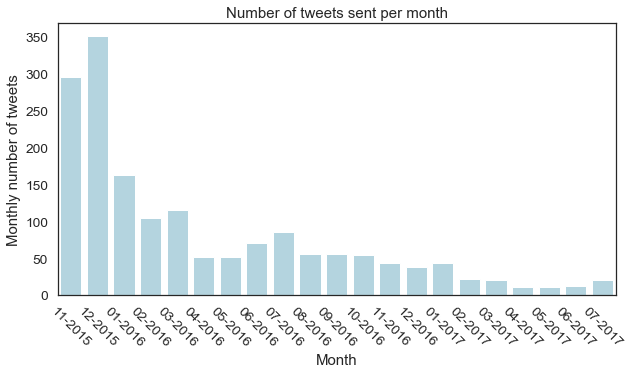

In [258]:
# The default is to plot the mean across subgroups, so use np.sum.
g = sns.barplot(x='Month', y = 'tweet_count', data=tf,
               color='lightblue', estimator=np.sum, ci=None)
g.set(ylabel='Monthly number of tweets')
g.set_title('Number of tweets sent per month')
plt.xticks(rotation='-45');

There was a peak in the first few months at over 300 tweets, probably due to the novelty. 

### Q2. How does the number of each dog stage vary over time?

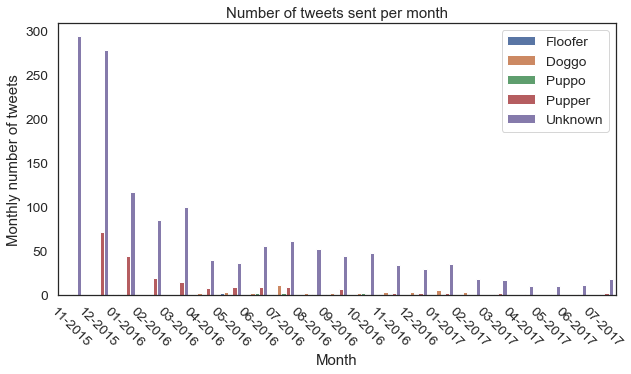

In [259]:
g = sns.barplot(x='Month', y = 'tweet_count', data=tf,
               hue='rate_type', ci=None)
g.set(ylabel='Monthly number of tweets')
g.set_title('Number of tweets sent per month')
plt.legend(loc='upper right')
plt.xticks(rotation='-45');

Very low number of dog stages. What do the percentages look like?

In [260]:
# Helper function defined at start of this stage. 
display(printable_stats_table(df, 'rate_type', 'Dog Stage')
        .style.hide_index().format({'Share (%)': '{:.0%}'}))

Dog Stage,Count,Share (%)
Unknown,1396,83%
Pupper,211,13%
Doggo,49,3%
Puppo,15,1%
Floofer,6,0%


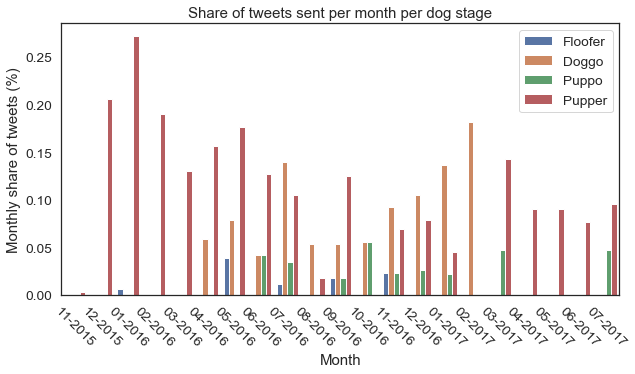

In [261]:
g = sns.barplot(x='Month', y = 'tweet_share', data=tf_stage,
               hue='rate_type', ci=None)
g.set(ylabel='Monthly share of tweets (%)')
g.set_title('Share of tweets sent per month per dog stage')
plt.legend(loc='upper right')
plt.xticks(rotation='-45');

Without the Unknowns the dog stages are more easily seen. Focus in on the period up to April 2016 and the period after. First before April 2016:

In [262]:
display(printable_stats_table(df.query(
    "timestamp < '2016-04-01 00:00:00'"), 'rate_type', 'Dog Stage')
        .style.hide_index().format({'Share (%)': '{:.0%}'}))

Dog Stage,Count,Share (%)
Unknown,874,85%
Pupper,152,15%
Floofer,1,0%
Puppo,0,0%
Doggo,0,0%


Now from April 2016:

In [263]:
display(printable_stats_table(df.query(
    "timestamp >= '2016-04-01 00:00:00'"), 'rate_type', 'Dog Stage')
        .style.hide_index().format({'Share (%)': '{:.0%}'}))

Dog Stage,Count,Share (%)
Unknown,522,80%
Pupper,59,9%
Doggo,49,8%
Puppo,15,2%
Floofer,5,1%


In the first months, the dog stage most frequently mentioned was by far 'pupper'. From May 2016, other stages were named, presumably after the dog stage schema was established. However, named stages remain seldom used, as shown by the large numbers of tweets where the type is 'Unknown'. 

After 1st May 2016, the number of references to pupper and doggo are much more similar with some comparatively less frequent references to puppo. It is strange that doggos are not mentioned from March 2017.

In [264]:
display(printable_stats_table(df.query(
    "timestamp >= '2017-03-01 00:00:00'"), 'rate_type', 'Dog Stage')
        .style.hide_index().format({'Share (%)': '{:.0%}'}), )

Dog Stage,Count,Share (%)
Unknown,68,87%
Pupper,8,10%
Puppo,2,3%
Doggo,0,0%
Floofer,0,0%


### Q3. How do the dog stages impact the number of retweets and favorites?

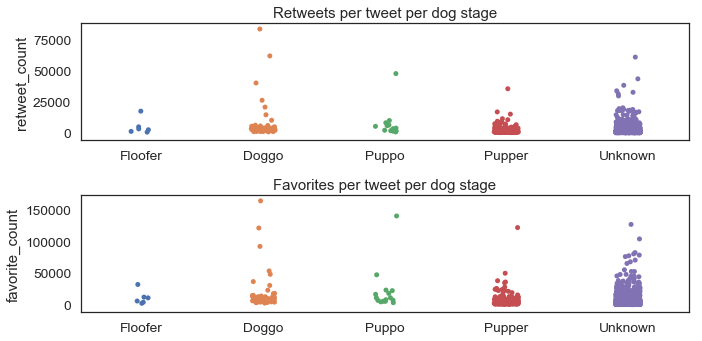

In [265]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_title(label='Retweets per tweet per dog stage')
ax2 = fig.add_subplot(212)
ax2.set_title(label='Favorites per tweet per dog stage')
g1 = sns.catplot(x='rate_type', y='retweet_count', ax=ax1, data=df)
ax1.set_xlabel('')
plt.close(g1.fig)
g2 = sns.catplot(x='rate_type', y='favorite_count', ax=ax2, data=df)
ax2.set_xlabel('')
plt.close(g2.fig)
plt.tight_layout();

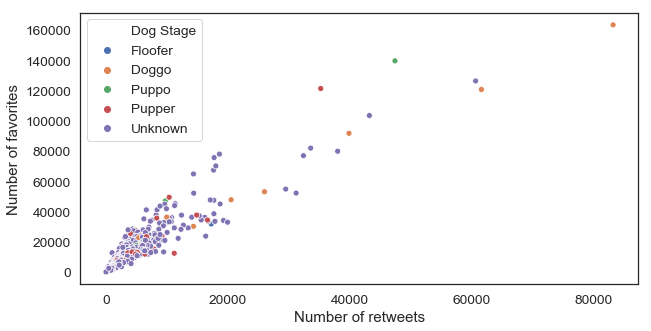

In [266]:
ax = sns.scatterplot(x='retweet_count', y='favorite_count',
                hue='rate_type', data=df)
ax.set_ylabel('Number of favorites')
ax.set_xlabel('Number of retweets')
legend = ax.legend()
legend.texts[0].set_text('Dog Stage');

How does this look if we examine the media type?

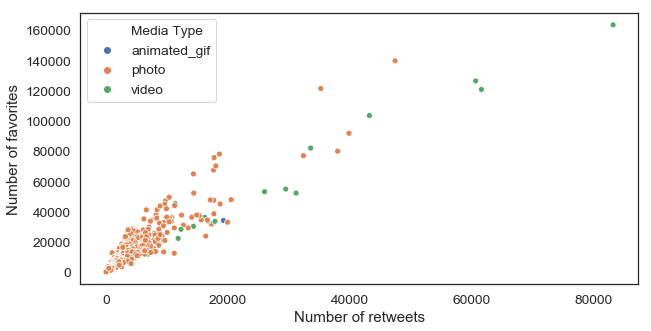

In [267]:
ax = sns.scatterplot(x='retweet_count', y='favorite_count',
                hue='image_type', data=df)
ax.set_ylabel('Number of favorites')
ax.set_xlabel('Number of retweets')
legend = ax.legend()
legend.texts[0].set_text('Media Type');

For the larger counts, video seems more frequent. Look at the average count per tweet per media type and use the median so the results are not too weighted to the large counts. 

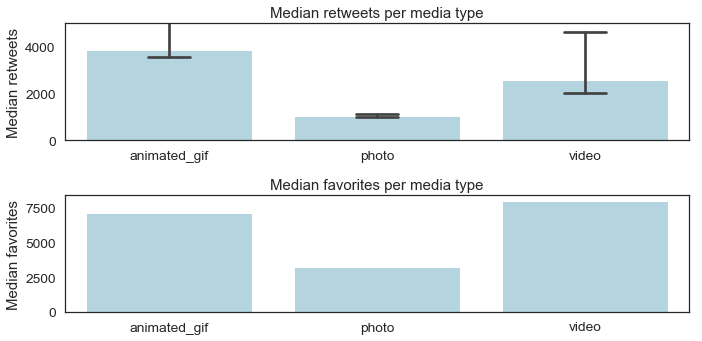

In [268]:
# Helper function defined at start of this stage. 
values_by_category(df, 'image_type',
                    'Median retweets per media type', 
                    'retweet_count', 'Median retweets',
                   np.median, 
                    'Median favorites per media type', 
                    'favorite_count', 'Median favorites',
                   np.median,
                   ci2='No error bars',
                   ylim1=(0,5000),
                    bar_color='lightblue')

As might be expected, videos and GIFs lead to larger counts. Look at the category counts. 

In [269]:
display(printable_stats_table(df, 'image_type', 'Media Type')
        .style.hide_index().format({'Share (%)': '{:.1%}'}))

Media Type,Count,Share (%)
photo,1612,96.1%
video,62,3.7%
animated_gif,3,0.2%


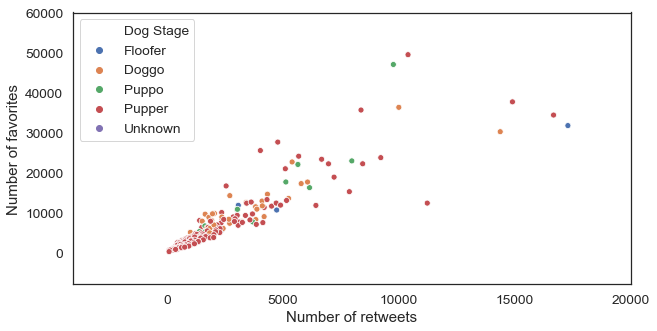

In [305]:
ax = sns.scatterplot(x='retweet_count', y='favorite_count',
                hue='rate_type', data=df.query('rate_type != "Unknown"'))
ax.set_ylabel('Number of favorites')
ax.set_xlabel('Number of retweets')
ax.set_xlim(right=20000)
ax.set_ylim(top=60000);
legend = ax.legend()
legend.texts[0].set_text('Dog Stage');

The two variables look highly correlated. Dispersion increases as the counts increase.

In [271]:
corr_retweet_fav = df['retweet_count'].corr(df['favorite_count'])
print('Correlation coefficient of retweets vs. favorites: {:.2f}'
      .format(corr_retweet_fav))

Correlation coefficient of retweets vs. favorites: 0.94


Examine the central position of the distribution of the number of retweets and favorites per type (using the median rather than the mean due to the presence of large outliers).

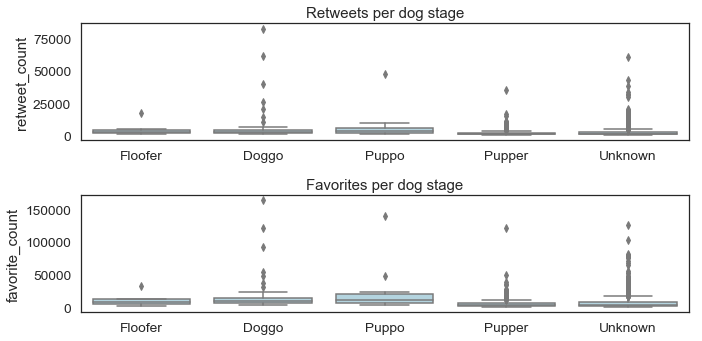

In [272]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_title(label='Retweets per dog stage')
ax2 = fig.add_subplot(212)
ax2.set_title(label='Favorites per dog stage')
sns.boxplot(y='retweet_count', x='rate_type',  color="lightblue",
            ax=ax1, data = df)
ax1.set_xlabel('')
sns.boxplot(y='favorite_count', x='rate_type',  color="lightblue",
            ax=ax2, data = df)
ax2.set_xlabel('')
plt.tight_layout();

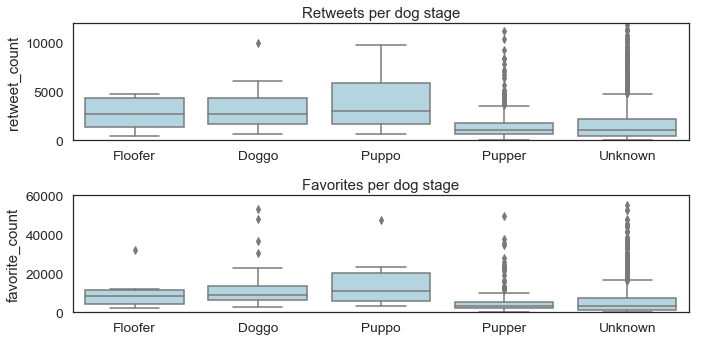

In [273]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_title(label='Retweets per dog stage')
ax1.set(ylim=(0, 12000));
ax2 = fig.add_subplot(212)
ax2.set_title(label='Favorites per dog stage')
ax2.set(ylim=(0, 60000));
sns.boxplot(y='retweet_count', x='rate_type',  color="lightblue",
            ax=ax1, data = df)
ax1.set_xlabel('')
sns.boxplot(y='favorite_count', x='rate_type',  color="lightblue",
            ax=ax2, data = df)
ax2.set_xlabel('')
plt.tight_layout();

The error bars in all bar charts show by default 95% confidence intervals.

Use of the types doggo and puppo and even floofer (although the number of these is very low) tends to correspond to higher retweet and favorite counts. Pupper is unexpectedly low and is not differentiated from those with no type mentioned (unknown). It is worth checking if the median of the pupper retweets and favorites is different only for those tweets from 1st April 2016. First looking at the whole time period:

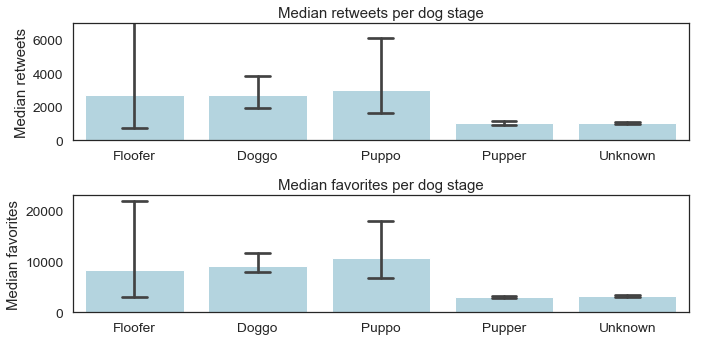

In [274]:
values_by_category(df, 'rate_type',
                    'Median retweets per dog stage', 
                    'retweet_count', 'Median retweets',
                   np.median,
                    'Median favorites per dog stage', 
                    'favorite_count', 'Median favorites',
                   np.median,
                   ylim1=(0,7000),
                    bar_color='lightblue')

That confirms the box plots. Now look at the period up until April 1st 2016, where there were no doggos or puppos and only 1 floofer (so no error bar for floofer):

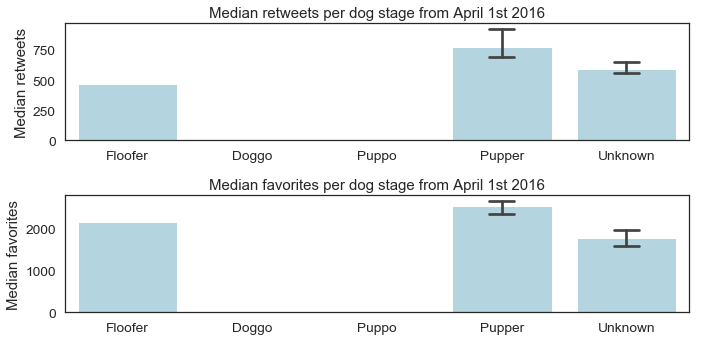

In [275]:
values_by_category(df.query("timestamp < '2016-04-01 00:00:00'"),
                   'rate_type',
                   'Median retweets per dog stage from April 1st 2016', 
                   'retweet_count',  'Median retweets',
                   np.median,
                   'Median favorites per dog stage from April 1st 2016', 
                   'favorite_count', 'Median favorites',
                   np.median,
                   bar_color='lightblue')

So for this period, Puppers tended to get more retweets and favorites than tweets that did not name a stage. Now Let's look at the period from  April 1st 2016: 

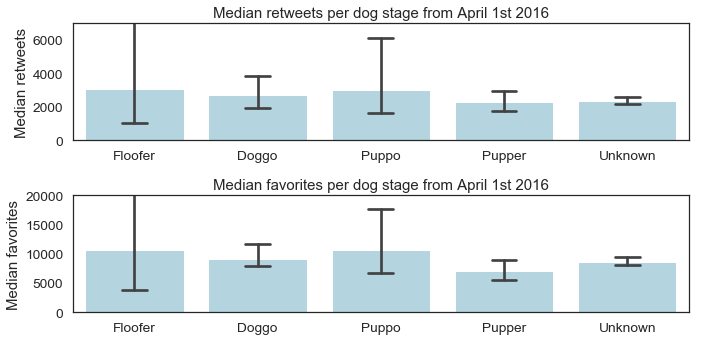

In [276]:
# Useful dataset for later.
df_from_april = df.query('timestamp >= "2016-04-01 00:00:00"')

values_by_category(df_from_april,
                   'rate_type',
                   'Median retweets per dog stage from April 1st 2016', 
                   'retweet_count', 'Median retweets',
                   np.median,
                   'Median favorites per dog stage from April 1st 2016', 
                   'favorite_count', 'Median favorites',
                   np.median,
                   ylim1=(0, 7000), ylim2=(0, 20000),
                   bar_color='lightblue')

The median retweets and favorites for a pupper are still a little lower than for a doggo but the difference is not as large. Is there some relation to media type?

In [277]:
display_crosstab(df, 'rate_type', 'Dog Stage', 'image_type', 'Media Type')

Media Type,animated_gif,photo,video
Dog Stage,,,
Floofer,0,5,1
Doggo,0,40,9
Puppo,0,14,1
Pupper,1,201,9
Unknown,2,1352,42


In [278]:
display(printable_stats_table(df_from_april.query('rate_type == "Doggo"'), 
                              'image_type', 'Doggo Media Type')
        .style.hide_index().format({'Share (%)': '{:.1%}'}))
display(printable_stats_table(df_from_april.query('rate_type == "Puppo"'), 
                              'image_type', 'Puppo Media Type')
        .style.hide_index().format({'Share (%)': '{:.1%}'}))
display(printable_stats_table(df_from_april.query('rate_type == "Pupper"'), 
                              'image_type', 'Pupper Media Type')
        .style.hide_index().format({'Share (%)': '{:.1%}'}))

Doggo Media Type,Count,Share (%)
photo,40,81.6%
video,9,18.4%
animated_gif,0,0.0%


Puppo Media Type,Count,Share (%)
photo,14,93.3%
video,1,6.7%
animated_gif,0,0.0%


Pupper Media Type,Count,Share (%)
photo,53,89.8%
video,6,10.2%
animated_gif,0,0.0%


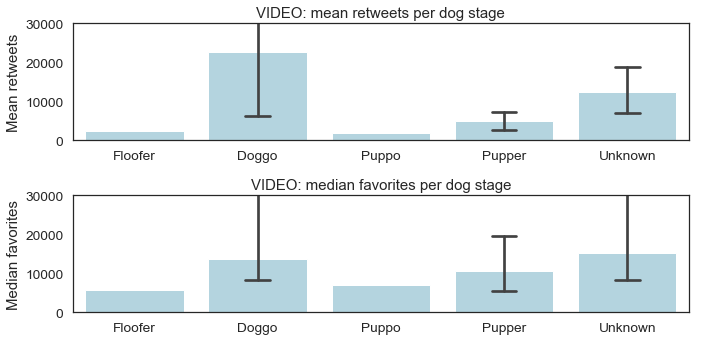

In [279]:
values_by_category(df_from_april.query('image_type == "video"'),
                   'rate_type',
                   'VIDEO: mean retweets per dog stage', 
                   'retweet_count', 'Mean retweets',
                   np.mean,
                   'VIDEO: median favorites per dog stage', 
                   'favorite_count', 'Median favorites',
                   np.median,
                   ylim1=(0, 30000), ylim2=(0, 30000),
                   bar_color='lightblue')

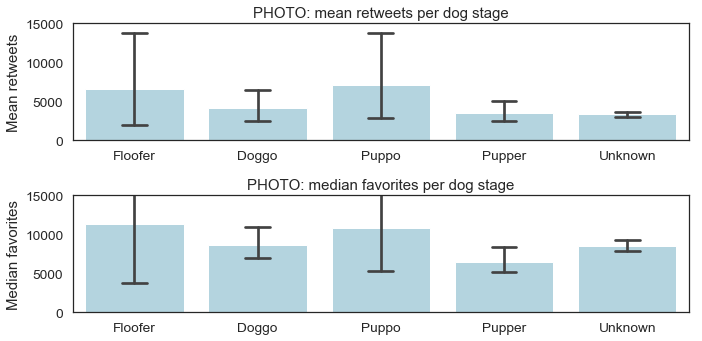

In [280]:
values_by_category(df_from_april.query('image_type == "photo"'),
                   'rate_type',
                   'PHOTO: mean retweets per dog stage', 
                   'retweet_count', 'Mean retweets',
                   np.mean,
                   'PHOTO: median favorites per dog stage', 
                   'favorite_count', 'Median favorites',
                   np.median,
                   ylim1=(0, 15000), ylim2=(0, 15000),
                   bar_color='lightblue')

Doggos had 18% videos compared to 10% puppers and at the same time higher counts for videos. But there is insufficient data to claim this as a pattern for the future.

### Q4. How do the dog stages impact the dog ratings?

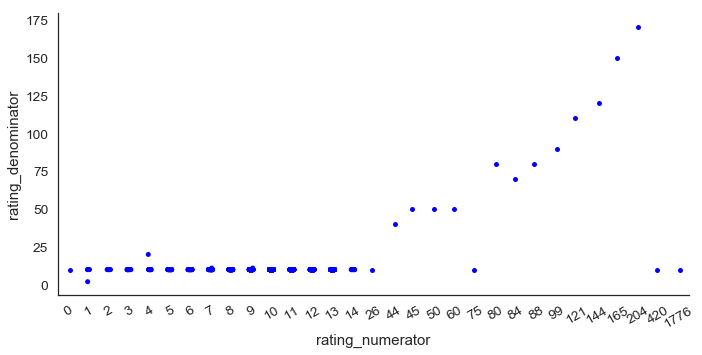

In [281]:
g = sns.catplot(x='rating_numerator', y='rating_denominator', 
                aspect=2, color='blue', data=df);
g.set_xticklabels(rotation=30);

To remove the more extreme ratings and provide some normalization, only denominators of 10 and numerators less than 30 will be included. Then the mean numerator scores can be examined.

In [282]:
df_standard = df.query(
    '(rating_denominator == 10)&(rating_numerator < 30)').copy()

In [283]:
df_standard.index = df_standard['timestamp']
numerator_frequency = df_standard.groupby(
    pd.Grouper(freq='MS'))[['rating_numerator']].mean().reset_index()
numerator_frequency['Month'] = numerator_frequency.timestamp.map(
    lambda x: x.strftime('%m-%Y'))

# Delete August 2017 which is incomplete.
numerator_frequency = numerator_frequency.query('timestamp < "2017-08-01"')

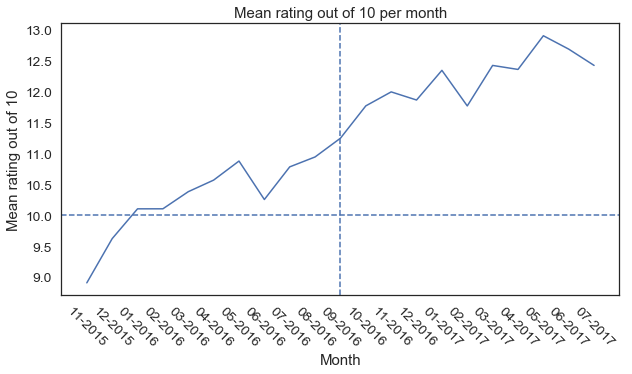

In [284]:
ax = sns.lineplot(x='Month', y='rating_numerator', sort=False,
             data=numerator_frequency)
ax.set(ylabel='Mean rating out of 10')
ax.set_title('Mean rating out of 10 per month')
ax.axhline(10, ls='--')
ax.axvline('09-2016', ls='--')
plt.xticks(rotation='-45');

Looking at "standard" ratings out of 10, and including only ratings below 30, the mean rating (mean of the numerator) has been increasing steadily from the start, and passed beyond a mean of 10 already in the 3rd month. The "they're good dogs, Brent" tweet defending the unique scoring was made on 12 September 2016, shown by the vertical reference line, when the mean scores were ca. 11.3 out of 10. One hypothesis would be that there is a continuous 'norming' of the scores such that in August 2017, 13/10 was the new norm. It would be interesting to see if there is a relation between these ratings and the dog types. 

In [285]:
df_standard.groupby(['rate_type'])['rating_numerator'].mean()

rate_type
Floofer    11.833333
Doggo      11.541667
Puppo      11.600000
Pupper     10.482927
Unknown    10.202312
Name: rating_numerator, dtype: float64

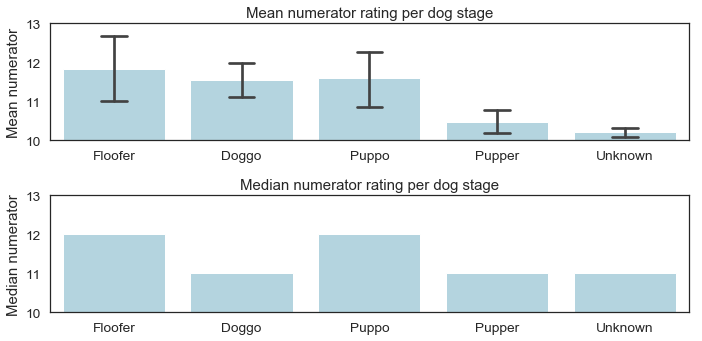

In [286]:
# The error bars for this median did not make sense.
# Any string for ci1 or ci2 will switch off the error bars.

values_by_category(df.query(
    "(rating_denominator == 10)&(rating_numerator < 30)"), 
                   'rate_type',
                   'Mean numerator rating per dog stage', 
                   'rating_numerator', 'Mean numerator',
                   np.mean,
                   'Median numerator rating per dog stage', 
                   'rating_numerator', 'Median numerator',
                   np.median,
                   ylim1=(10,13), ylim2=(10,13),
                   ci2 = 'switch off error bars',
                  bar_color='lightblue')

Note that for clarity in viewing the error bars (95% confidence intervals), the y axis has been zoomed to the range 10 to 13.

Similar to the retweet and favorite count, all named types except Pupper seem to receive higher ratings on average. In case this is again an effect of the early months where Pupper was the dominant type, the ratings from 1st April 2016 are also checked.

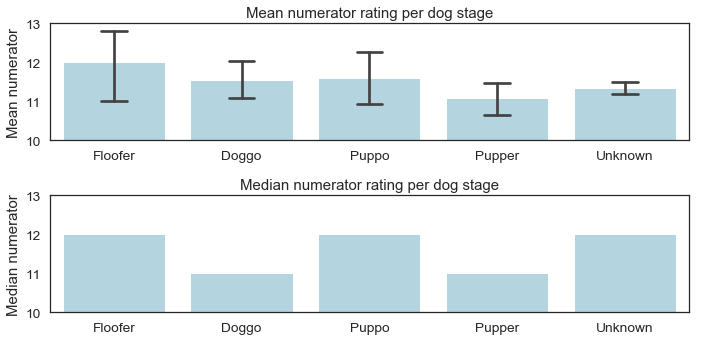

In [287]:
# The error bars for this median did not make sense. 
# Error bars switched off by setting estimator parameter to None. 

values_by_category(df_from_april.query(
    "(rating_denominator == 10)&(rating_numerator < 30)"), 
                   'rate_type',
                   'Mean numerator rating per dog stage', 
                   'rating_numerator', 'Mean numerator',
                   np.mean,
                   'Median numerator rating per dog stage', 
                   'rating_numerator', 'Median numerator',
                   np.median,
                   ylim1=(10,13), ylim2=(10,13),
                   ci2 = 'switch off error bars',
                  bar_color='lightblue')

Again, from April 2016 there was much less distinction of ratings across the different dog types. Due to ratings being lower at a time when the Pupper was the predominant named dog type, this has the effect of lowering the mean rating for Pupper across the whole timeline. From April 2016, when other dog types appear, there was inadequate evidence of any difference in ratings between the known dog types.

### Q5. How do the dog stages impact top prediction confidence

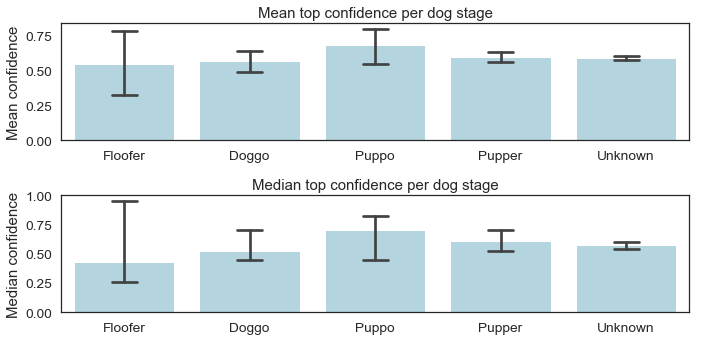

In [288]:
values_by_category(df, 'rate_type',
                   'Mean top confidence per dog stage', 
                   'predict_1_confidence', 'Mean confidence',
                   np.mean,
                   'Median top confidence per dog stage', 
                   'predict_1_confidence',  'Median confidence',
                   np.median,
                  bar_color='lightblue')

There is a tendency for pictures of Puppos and Multiples to receive a higher top prediction confidence. The error bars, representing 95% confidence intervals, show however, that the sample sizes are marginal to make clear distinctions. If it were important to confirm this effect, either more data must be collected or statistical tests of significant difference must be made.

This is an interesting effect and might be explained by certain dog stages having clearer breed characteristics. For example, perhaps a Puppo shows these characteristics better than the other stages. Multiples might have more success in finding an optimal match simply because they provide more options - for example, an older and younger dog of the same breed in the same image. 

### Q6. What share of top predictions did not recognize a dog and were there really no dogs in the images?

In [289]:
print('Proportion of dogs identified in #1 predictions was: {:.1%}'
      .format(df.predict_1_is_dog.mean()))
print('Proportion of dogs identified in #2 predictions was: {:.1%}'
      .format(df.predict_2_is_dog.mean()))
print('Proportion of dogs identified in #3 predictions was: {:.1%}'
      .format(df.predict_3_is_dog.mean()))
print('Proportion of dogs identified in any prediction was: {:.1%}'
      .format((df.predict_1_is_dog | df.predict_2_is_dog |
              df.predict_3_is_dog).mean()))

Proportion of dogs identified in #1 predictions was: 73.2%
Proportion of dogs identified in #2 predictions was: 74.3%
Proportion of dogs identified in #3 predictions was: 71.9%
Proportion of dogs identified in any prediction was: 83.8%


The following cell grabs a sample of 5 images from the top predictions that were marked as not being a dog. By repeatedly running the cell, it is possible to find examples of dogs in the image that the top prediction missed. 

In [290]:
# Helper function defined at start of stage.
display_subset_images(df, 'predict_1_is_dog == False', sample=5)

Tweet identifier: 707693576495472641
#1: Bathtub (50%) -> #2: Tub(49%) -> #3: Washbasin (1%)


Tweet identifier: 760190180481531904
#1: Balloon (92%) -> #2: Confectionery(5%) -> #3: Maraca (2%)


Tweet identifier: 723179728551723008
#1: Tennis Ball (18%) -> #2: Badger(6%) -> #3: Norwegian Elkhound (6%)


Tweet identifier: 668960084974809088
#1: Shower Curtain (23%) -> #2: Chesapeake Bay Retriever(17%) -> #3: Bathtub (6%)


Tweet identifier: 686003207160610816
#1: Damselfly (19%) -> #2: Common Newt(10%) -> #3: Whiptail (9%)


So around 25 to 30% of the images were not recognized as dogs. Using some examples, let's look at some reasons why this might happen. The examples were found by browsing the images. The predictions are listed in order from high to low, with confidence values.

##### Examples where there was simply not enough dog in the image.
Example 1 predicted Orange (10%), Bagel (9%), Banana (8%).

Example 2 predicted Teapot (98%), Cup (1%), Coffeepot (0%).

Example 3 predicted Bakery (74%), Saltshaker (5%), Teddy (5%).

In [291]:
image_list = []
image_list.append(df.query('tweet_id == 892420643555336193')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 840370681858686976')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 793135492858580992')
                  .iloc[0].url_most_confident_image)
Images(image_list, header=['Example 1', 
                           'Example 2',
                           'Example 3'])

Example 1,Example 2,Example 3
,,


##### Examples where other objects dominate the recognition.
Example 4 predicted Tennis Ball (71%), Kelpie (11%), Malinois (6%).

Example 5 predicted Seat Belt (95%), Toy Terrier (4%), Beagle (0%).

Example 6 predicted Hotdog (83%), Rottweiler (7%), Labrador Retriever (5%).

In [292]:
image_list = []
image_list.append(df.query('tweet_id == 850145622816686080')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 670427002554466305')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 709042156699303936')
                  .iloc[0].url_most_confident_image)
Images(image_list, header=['Example 4', 
                           'Example 5', 
                           'Example 6'])

Example 4,Example 5,Example 6
,,


##### Examples where costumes and toys prevent identification.

Example 7 predicted Ski Mask (98%), Chihuahua (1%), Kelpie (0%).

Example 8 predicted Bow Tie (53%), Sunglasses (8%), Sunglass (5%)

Example 9 predicted Teddy (59%), Jigsaw Puzzle (3%), Doormat (2%). 

In [293]:
image_list = []
image_list.append(df.query('tweet_id == 673342308415348736')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 749981277374128128')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 824297048279236611')
                  .iloc[0].url_most_confident_image)
Images(image_list, header=['Example 7', 
                           'Example 8',
                           'Example 9'])

Example 7,Example 8,Example 9
,,


##### Examples where they are too similar to something else.
Example 10 predicted Teddy (97%), Toy Poodle (1%), Chow (0%).

Example 11 predicted Long-Horned Beetle (61%), Ox (3%), Rhinoceros Beetle (3%).

Example 12 predicted Dough (81%), Bakery (3%), French Loaf (2%)

In [294]:
image_list = []
image_list.append(df.query('tweet_id == 785927819176054784')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 775733305207554048')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 675501075957489664')
                  .iloc[0].url_most_confident_image)
Images(image_list, header=['Example 10', 
                           'Example 11',
                           'Example 12'])

Example 10,Example 11,Example 12
,,


##### Examples where it really isn't 'a dog'.

Example 13 predicted Radio Telescope (16%), Dam (15%), Crane (10%)

Example 14 predicted Espresso (43%), Coffee Mug (42%), Cup (9%)

Example 15 predicted Dogsled (43%), Cocker Spaniel, Chihuahua (7%)

In [295]:
image_list = []
image_list.append(df.query('tweet_id == 760252756032651264')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 711968124745228288')
                  .iloc[0].url_most_confident_image)
image_list.append(df.query('tweet_id == 689599056876867584')
                  .iloc[0].url_most_confident_image)
Images(image_list, header=['Example 13', 
                           'Example 14',
                           'Example 15'])

Example 13,Example 14,Example 15
,,


Ca. 25-30% of the images are not recognized as dogs. The algorithm sometimes recognizes other objects in the image although a dog is clearly present. In these cases, the second or third prediction sometimes does find a dog.  And sometimes there is no dog.

### Q7. Is there a relationship between most confident image and top prediction confidence?

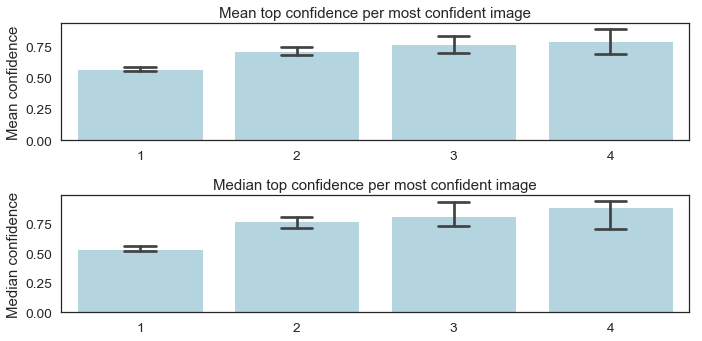

In [296]:
values_by_category(df, 'most_confident_image',
                   'Mean top confidence per most confident image', 
                   'predict_1_confidence', 'Mean confidence',
                   np.mean,
                   'Median top confidence per most confident image', 
                   'predict_1_confidence',  'Median confidence',
                   np.median,
                  bar_color='lightblue')

The most confident image values indicate that there were more images to which the prediction algorithm could be applied:
2 would mean there were at least 2 images
3 at least 3 images
4 at least 4 images (the description implies 4 was the maximum examined). 
An explanation of the positive linear relationship between most confident image and top prediction confidence could be that with more available images there is more opportunity for correctly identifying the image. The error bars (95% confidence intervals) show that the significance of the differences between 2 and 3, and 3 and 4 is marginal and would need more data or statistical tests of significant difference to confirm the effect. 

These values can be compared with the actual number of media files (also 1 to 4 possible, i.e. up to 4 photos, or one video thumbnail or one animated GIF thumbnail). 

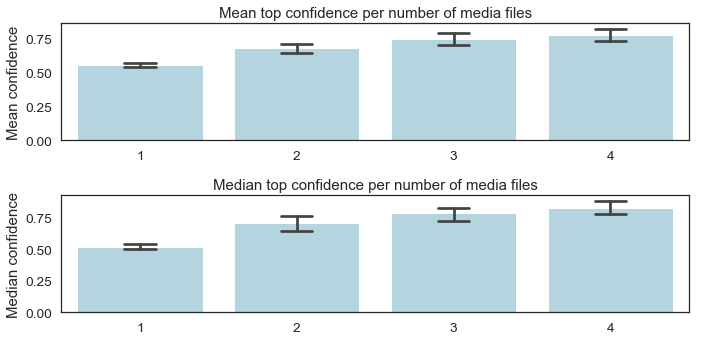

In [297]:
values_by_category(df, 'image_count',
                   'Mean top confidence per number of media files', 
                   'predict_1_confidence', 'Mean confidence',
                   np.mean,
                   'Median top confidence per number of media files', 
                   'predict_1_confidence',  'Median confidence',
                   np.median,
                  bar_color='lightblue')

Follows a similar pattern to the most confident image. See how they cross-tabulate with each other.  

In [298]:
display_crosstab(df, 'image_count', 'Number of images', 
                 'most_confident_image', 'Most confident image')

Most confident image,1,2,3,4
Number of images,,,,
1,1300,0,0,0
2,112,102,0,0
3,31,27,23,0
4,19,24,22,17


The most confident images tend to be spread fairly evenly across the media files. It would be interesting to see if the number of images per submitted tweet changed over time.

In [299]:
image_frequency = df_standard.groupby(
    pd.Grouper(freq='MS'))[['image_count']].mean().reset_index()
image_frequency['Month'] = image_frequency.timestamp.map(
    lambda x: x.strftime('%m-%Y'))
# Delete August 2017 which is incomplete.
image_frequency.drop(image_frequency.tail(1).index,inplace=True)

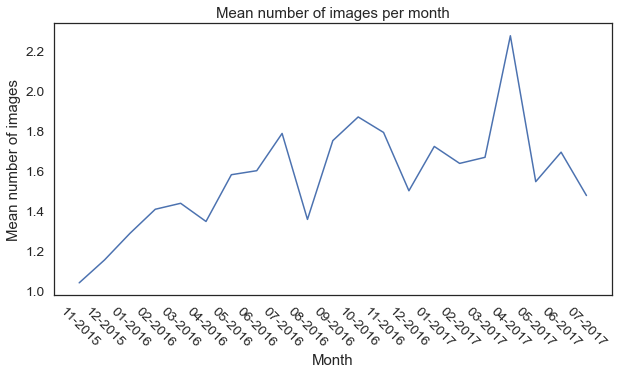

In [300]:
ax = sns.lineplot(x='Month', y='image_count', sort=False,
             data=image_frequency)
ax.set(ylabel='Mean number of images')
ax.set_title('Mean number of images per month')
plt.xticks(rotation='-45');

There was a ramp-up which reached an average of around 1.7 images by August 2018.

### Q8. How are the media types distributed and how does the type relate to top prediction confidence?

In [301]:
df.image_type.value_counts()

photo           1612
video             62
animated_gif       3
Name: image_type, dtype: int64

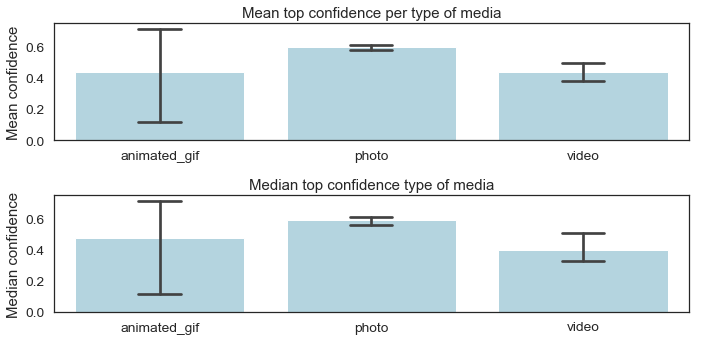

In [302]:
values_by_category(df, 'image_type',
                   'Mean top confidence per type of media', 
                   'predict_1_confidence', 'Mean confidence',
                   np.mean,
                   'Median top confidence type of media', 
                   'predict_1_confidence',  'Median confidence',
                   np.median,
                  bar_color='lightblue')

There are too few animated gifs to come to a conclusion, but the video thumbnails lead to a lower confidence compared to the photos. The gif thumbnails and examples of the video thumbnails can be examined.

First the 3 gifs:

In [303]:
display_subset_images(df, 'image_type == "animated_gif"')

Tweet identifier: 711694788429553666
#1: Brown Bear (71%) -> #2: Indian Elephant(17%) -> #3: Water Buffalo (4%)


Tweet identifier: 692752401762250755
#1: Samoyed (47%) -> #2: Siberian Husky(16%) -> #3: Eskimo Dog (14%)


Tweet identifier: 671789708968640512
#1: Dalmatian (11%) -> #2: Teddy(6%) -> #3: Steam Locomotive (5%)


Then a sample of the videos:

In [304]:
display_subset_images(df, 'image_type == "video"', sample=5)

Tweet identifier: 753420520834629632
#1: Balloon (27%) -> #2: Lakeside(9%) -> #3: Rapeseed (4%)


Tweet identifier: 800018252395122689
#1: Vacuum (29%) -> #2: Punching Bag(24%) -> #3: Barbell (14%)


Tweet identifier: 768970937022709760
#1: Pomeranian (18%) -> #2: Golden Retriever(11%) -> #3: Mousetrap (9%)


Tweet identifier: 821149554670182400
#1: German Shepherd (52%) -> #2: Malinois(20%) -> #3: Irish Setter (9%)


Tweet identifier: 744234799360020481
#1: Labrador Retriever (83%) -> #2: Ice Bear(4%) -> #3: Whippet (2%)


<a id='conclusions'></a>
***
## Conclusions

The following conclusions may be drawn from this analysis:
<ul>
    <li>The number of named dog types remained low across the timeline. In total, ca. 83% did not name a dog type. A small number named multiple types, for example ‘Doggo' and ‘Puppo' in pictures of older and younger dogs together.</li>
    <li>There is a strong correlation between retweet counts and favorite counts per tweet, as might be expected (Pearson correlation coefficient was 0.93 across the whole dataset).</li>
    <li>At first it seemed that the dog type Pupper and those without a named type (Unknown) tend to have much lower retweet and favorite counts compared to the other dog types (comparing the medians). However, when only the tweets after 1st April 2016 were compared, this distinction was no longer to be seen. One cause of this might be that the majority of pupper and unknown tweets in the dataset were prior to April 2016, but that was a phase in which the followers of We Rate Dogs was comparatively low, so the opportunities for a retweet or favorite were less.
    </li>
    <li>There is a tendency for pictures of puppos to receive a higher top prediction confidence. This is an interesting effect and might be explained by certain dog stages having clearer breed characteristics. For example, perhaps a puppo, which is somewhere between a puppy and a fully mature dog, shows these characteristics more clearly than the other stages. Multiples might have more success in finding an optimal match simply because they provide more options - for example, they might include an older and younger dog of the same breed in the same image, or several dogs of the same breed in the same image. Unfortunately there were too few observed instances of Multiples (observed only when the text states more than one stage) to confirm this effect.</li>
    <li>The majority of dog ratings stick to using 10 as the denominator, although there are also exceptions to this, for the purposes of humor, or multiplying up ratings for groups of dogs, for example. An analysis of the ratings that used 10 as a denominator showed that the ratings are increasing steadily over time, which suggests that higher ratings gradually become the new norm.</li>
    <li>An effect similar to the retweet and favorite counts was seen in the mean ratings out of 10 per dog type (only ratings out of 10 and with a numerator less than 30 were considered for this analysis). Across the entire timeline, the types ‘pupper’ and ‘unknown’ show a significantly lower mean rating out of 10. However, as explained above, prior to April 2016, these types were predominant in the phase where the ratings tended to be lower. By examining only the ratings from April 2016, the difference in rating between the dog types was much smaller, except for a slight tendency of named types to be rated higher than those not named (unknown).</li>
    <li>The most confident image (from 1 to 4) did show higher top predictions as the image number increases. This might be because with higher image numbers there were implicitly more objects to which the prediction algorithm could be applied:
1 would imply there was at least 1 image,
2 at least 2 images,
3 at least 3 images,
4 at least 4 images (4 was the maximum number of images examined). 
The same effect was seen when examining the top predictions for tweets with 1, 2, 3 or 4 media files. Generally, with more available images there is more opportunity for identifying an object with high confidence. The error bars (95% confidence intervals) show that the significance of the differences between 2 and 3, and 3 and 4 is marginal and would need more data or statistical tests of significant difference to confirm the effect. This effect was also observed for the count of the actual number of images. A crosstabulation between the most confident image values and the count of media files showed no evidence that the most confident image favours a particular media file number, i.e. it is not the case that the first photo leads to more confidence than the last. </li>
    <li> There are too few animated gifs to come to a conclusion, but the video thumbnails lead to a lower confidence compared to the photos. One reason for this could be that multiple photos are possible, but only one video thumbnail image, so there are more opportunities to find a good match with one of the objects over multiple photos (in cases where more than one photo was submitted). Another reason could be that the video thumbnails are only one frame from the video and might miss the subject, be blurred or have low resolution. The gif thumbnails and examples of the video thumbnails can be examined.
</ul>

<a id='recommendations'></a>
***
## Further Recommendations
<ol>
    <li>For some of the analyses that do not require the corresponding image prediction data, or if new prediction data can be generated, tweets from August 2017 onwards could be collected to extend the enhanced archive.</li>
    <li>Further analyses should note that there is only one day from August 2017 included in the dataset. 
    <li>Reasons for differences between the list of tweet ids in the original enhanced archive, the online archive and the image predictions could be investigated. One possibility is the deletion of tweets. Each of these sources were captured at different dates. Some of the analyses that do not require entries in both tables could be repeated on the relevant whole source table instead of using a merged table.</li>
    <li>More efforts could be made to identify images with multiple dogs, e.g. where rating denominators are multiples of 10. That could provide more data for testing the hypothesis that multiple dogs in an image lead to a higher dog prediction confidence.</li>
    <li> In general a subjective labelling of the images by humans would support further analyses. </li>
    <li>There some other fields available in the online twitter archive. More fields could be integrated into the analysis. For example user characteristics could be extracted into a user table. </li>
</ol>

<a id='references'></a>
***
## References
In this section are external references that were used during this project.

Reference 1:
https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks

Reference 2:
https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json

Reference 3:
https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns

Reference 4:
https://stackoverflow.com/questions/25938557/pandas-convert-string-column-to-ordered-category

Reference 5:
https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

Reference 6:
http://blog.booleanbiotech.com/ipython_notebook_tips.html
